# Data preprocessing

## Setup

Requires Python 3.10 and Poetry 1.6. Run setup commands to begin:
```
!poetry install
!poetry run jupyter lab
```

In [1]:
import os
import copy
import math
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_columns = None
display_plots = False

Load data

In [2]:
def get_raw_data():
    return {
        "A": {
            "test_est": pd.read_parquet(os.path.join("data", "A", "X_test_estimated.parquet")),
            "train_est": pd.read_parquet(os.path.join("data", "A", "X_train_estimated.parquet")),
            "train_obs": pd.read_parquet(os.path.join("data", "A", "X_train_observed.parquet")),
            "train_tar": pd.read_parquet(os.path.join("data", "A", "train_targets.parquet")),
        },
        "B": {
            "test_est": pd.read_parquet(os.path.join("data", "B", "X_test_estimated.parquet")),
            "train_est": pd.read_parquet(os.path.join("data", "B", "X_train_estimated.parquet")),
            "train_obs": pd.read_parquet(os.path.join("data", "B", "X_train_observed.parquet")),
            "train_tar": pd.read_parquet(os.path.join("data", "B", "train_targets.parquet")),
        },
        "C": {
            "test_est": pd.read_parquet(os.path.join("data", "C", "X_test_estimated.parquet")),
            "train_est": pd.read_parquet(os.path.join("data", "C", "X_train_estimated.parquet")),
            "train_obs": pd.read_parquet(os.path.join("data", "C", "X_train_observed.parquet")),
            "train_tar": pd.read_parquet(os.path.join("data", "C", "train_targets.parquet")),
        },
    }
data = get_raw_data()

View raw data

In [3]:
for loc in data:
    for type in data[loc]:
        display(loc, type, data[loc][type])

'A'

'test_est'

,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2023-04-30 07:00:04,2023-05-01 00:00:00,4.4,1.286,912.700012,0.0,0.0,1041.199951,0.0,271.700012,0.0,0.0,0.0,0.0,80.699997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.900024,0.0,0.0,1000.700012,1007.000000,0.0,0.0,80.300003,1013.299988,NaN,0.0,0.0,0.0,0.0,10.520000,-11.185,0.0,273.799988,80.699997,30210.699219,4.0,2.2,3.4,-0.0
1,2023-04-30 07:00:04,2023-05-01 00:15:00,4.3,1.287,912.700012,0.0,0.0,1054.800049,0.0,271.700012,0.0,0.0,0.0,0.0,77.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.700012,0.0,0.0,1000.599976,1006.900024,0.0,0.0,80.300003,1013.200012,NaN,0.0,0.0,0.0,0.0,14.203000,-10.825,0.0,273.799988,77.000000,30003.599609,4.0,2.1,3.4,-0.0
2,2023-04-30 07:00:04,2023-05-01 00:30:00,4.3,1.287,912.700012,0.0,0.0,1068.300049,0.0,271.600006,0.0,0.0,0.0,0.0,73.099998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.599976,0.0,0.0,1000.500000,1006.700012,0.0,0.0,80.300003,1013.000000,NaN,0.0,0.0,0.0,0.0,17.868999,-10.360,0.0,273.799988,73.099998,29797.099609,3.9,2.1,3.3,-0.0
3,2023-04-30 07:00:04,2023-05-01 00:45:00,4.3,1.287,912.700012,0.0,0.0,1081.900024,0.0,271.600006,0.0,0.0,0.0,0.0,69.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.500000,0.0,0.0,1000.400024,1006.599976,0.0,0.0,80.199997,1012.900024,NaN,0.0,0.0,0.0,0.0,21.514000,-9.794,0.0,273.799988,69.000000,29618.599609,3.9,2.0,3.3,-0.0
4,2023-04-30 07:00:04,2023-05-01 01:00:00,4.3,1.287,NaN,0.0,0.0,1095.400024,0.0,271.600006,0.0,0.0,0.0,0.0,64.500000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.299988,0.0,0.0,1000.200012,1006.500000,0.0,0.0,80.199997,1012.799988,NaN,0.0,0.0,0.0,0.0,25.135000,-9.128,0.0,273.799988,64.500000,29507.500000,3.9,2.0,3.3,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,2023-07-02 07:00:31,2023-07-03 22:45:00,9.1,1.207,2090.600098,0.0,0.0,1629.400024,0.0,282.700012,0.0,0.0,0.0,0.0,99.300003,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.299988,0.0,0.0,980.799988,986.700012,0.0,0.0,82.199997,992.599976,NaN,0.0,0.0,-0.0,0.0,351.855988,-3.282,0.1,285.399994,99.400002,39931.601562,2.1,1.7,-1.3,0.0
2876,2023-07-02 07:00:31,2023-07-03 23:00:00,9.1,1.207,2015.800049,0.0,0.0,1537.300049,0.0,282.700012,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.400024,0.0,0.0,980.900024,986.799988,0.0,0.0,82.500000,992.700012,NaN,0.0,0.0,-0.0,0.0,355.317993,-3.469,0.1,285.299988,100.000000,39574.300781,2.0,1.6,-1.3,0.0
2877,2023-07-02 07:00:31,2023-07-03 23:15:00,9.1,1.208,2015.699951,0.0,0.0,1471.400024,0.0,282.700012,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.500000,0.0,0.0,981.000000,986.900024,0.0,0.0,82.800003,992.799988,NaN,0.0,0.0,-0.0,0.0,358.785004,-3.556,0.1,285.299988,100.000000,39627.199219,2.0,1.6,-1.2,0.0
2878,2023-07-02 07:00:31,2023-07-03 23:30:00,9.0,1.208,2015.599976,0.0,0.0,1405.500000,0.0,282.700012,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.599976,0.0,0.0,981.000000,986.900024,0.0,0.0,83.199997,992.900024,NaN,0.0,0.0,-0.0,0.0,2.253000,-3.541,0.1,285.200012,100.000000,39691.800781,2.0,1.6,-1.1,0.0


'A'

'train_est'

,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2022-10-27 07:00:18,2022-10-28 22:00:00,8.4,1.233,1425.099976,0.0,0.0,1211.699951,1.0,281.399994,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1001.099976,0.0,0.0,988.500000,994.500000,0.0,0.0,92.699997,1000.599976,NaN,0.0,0.0,-0.0,0.4,340.799011,-38.466999,0.0,284.700012,100.000000,29429.699219,0.8,-0.4,0.7,-0.0
1,2022-10-27 07:00:18,2022-10-28 22:15:00,8.4,1.233,2085.899902,0.0,0.0,1560.500000,1.0,281.299988,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.799988,0.0,0.0,988.200012,994.200012,0.0,0.1,92.699997,1000.299988,NaN,0.0,0.0,-0.0,0.4,345.451996,-38.955002,0.0,284.700012,100.000000,23604.099609,0.7,-0.4,0.7,-0.0
2,2022-10-27 07:00:18,2022-10-28 22:30:00,8.3,1.233,2746.600098,0.0,0.0,1909.400024,1.0,281.200012,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.400024,0.0,0.0,987.900024,993.900024,0.0,0.1,92.699997,1000.000000,NaN,0.0,0.0,-0.0,0.5,350.153015,-39.310001,0.0,284.700012,100.000000,17799.800781,0.7,-0.3,0.6,-0.0
3,2022-10-27 07:00:18,2022-10-28 22:45:00,8.3,1.233,3407.399902,0.0,0.0,2258.199951,1.0,281.200012,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.099976,0.0,0.0,987.599976,993.599976,0.0,0.1,92.599998,999.700012,NaN,0.0,0.0,-0.0,0.6,354.886993,-39.528999,0.0,284.600006,100.000000,12016.500000,0.6,-0.2,0.6,-0.0
4,2022-10-27 07:00:18,2022-10-28 23:00:00,8.2,1.233,4068.199951,0.0,0.0,2607.000000,1.0,281.100006,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,999.799988,0.0,0.0,987.299988,993.299988,0.0,0.1,92.599998,999.299988,NaN,0.0,0.0,-0.0,0.6,359.638000,-39.609001,0.0,284.600006,100.000000,6254.399902,0.6,-0.1,0.6,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17571,2023-04-29 07:00:05,2023-04-30 22:45:00,4.5,1.281,1173.900024,0.0,0.0,536.500000,0.0,272.299988,0.0,0.0,0.0,0.0,99.599998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.299988,0.0,0.0,1001.099976,1007.400024,0.0,0.0,79.599998,1013.700012,NaN,0.0,0.0,-0.0,0.1,352.920013,-11.731000,0.1,274.200012,99.900002,11629.299805,3.9,2.9,2.5,-0.0
17572,2023-04-29 07:00:05,2023-04-30 23:00:00,4.5,1.281,1054.199951,0.0,0.0,542.400024,0.0,272.200012,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.299988,0.0,0.0,1001.099976,1007.299988,0.0,0.0,80.000000,1013.599976,NaN,0.0,0.0,-0.0,0.1,356.634003,-11.884000,0.1,274.200012,100.000000,9923.200195,3.7,2.8,2.4,-0.0
17573,2023-04-29 07:00:05,2023-04-30 23:15:00,4.5,1.281,1435.800049,0.0,0.0,531.799988,0.0,272.299988,0.0,0.0,0.0,0.0,99.400002,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.099976,0.0,0.0,1000.900024,1007.200012,0.0,0.0,79.900002,1013.500000,NaN,0.0,0.0,-0.0,0.1,0.352000,-11.928000,0.1,274.200012,99.900002,11230.799805,3.7,2.7,2.5,-0.0
17574,2023-04-29 07:00:05,2023-04-30 23:30:00,4.5,1.281,1817.400024,0.0,0.0,521.200012,0.0,272.299988,0.0,0.0,0.0,0.0,98.099998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.000000,0.0,0.0,1000.799988,1007.000000,0.0,0.0,79.800003,1013.299988,NaN,0.0,0.0,-0.0,0.0,4.070000,-11.864000,0.1,274.200012,99.599998,12526.099609,3.8,2.7,2.6,-0.0


'A'

'train_obs'

,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2019-06-02 22:00:00,7.7,1.230,1744.900024,0.0,0.0,1744.900024,0.0,280.299988,0.0,0.0,0.0,0.0,98.699997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.799988,0.0,0.0,994.200012,1000.299988,0.0,0.0,73.099998,1006.299988,NaN,0.0,0.0,-0.0,0.1,342.834015,-3.202000,0.0,285.899994,100.0,39640.101562,3.7,-3.6,-0.8,-0.0
1,2019-06-02 22:15:00,7.7,1.229,1734.000000,0.0,0.0,1734.000000,0.0,280.299988,0.0,0.0,0.0,0.0,99.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.500000,0.0,0.0,993.900024,999.900024,0.0,0.0,72.199997,1006.000000,NaN,0.0,0.0,-0.0,0.2,346.294006,-3.650000,0.0,286.100006,100.0,40123.898438,3.6,-3.6,-0.6,-0.0
2,2019-06-02 22:30:00,7.7,1.228,1723.500000,0.0,0.0,1723.500000,0.0,280.299988,0.0,0.0,0.0,0.0,99.199997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.099976,0.0,0.0,993.599976,999.599976,0.0,0.0,71.199997,1005.599976,NaN,0.0,0.0,-0.0,0.2,349.768005,-3.998000,0.0,286.299988,100.0,40628.300781,3.6,-3.6,-0.4,-0.0
3,2019-06-02 22:45:00,7.7,1.226,1713.400024,0.0,0.0,1713.400024,0.0,280.299988,0.0,0.0,0.0,0.0,99.400002,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1005.799988,0.0,0.0,993.299988,999.299988,0.0,0.0,70.199997,1005.299988,NaN,0.0,0.0,-0.0,0.2,353.251007,-4.247000,0.0,286.600006,100.0,41153.601562,3.5,-3.5,-0.2,-0.0
4,2019-06-02 23:00:00,7.7,1.225,1703.599976,0.0,0.0,1703.599976,0.0,280.299988,0.0,0.0,0.0,0.0,99.599998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1005.500000,0.0,0.0,993.000000,999.000000,0.0,0.0,69.199997,1005.000000,NaN,0.0,0.0,-0.0,0.2,356.742004,-4.393000,0.0,286.799988,100.0,41699.898438,3.5,-3.5,0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118664,2022-10-21 00:00:00,5.0,1.292,NaN,0.0,0.0,NaN,0.0,273.700012,0.0,0.0,0.0,0.0,2.800000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1018.400024,0.0,0.0,1005.500000,1011.799988,0.0,0.0,82.699997,1018.099976,NaN,0.0,0.0,-0.0,0.0,16.612000,-36.306000,0.0,276.899994,2.8,25791.000000,1.3,-0.4,1.2,-0.0
118665,2022-10-21 00:15:00,5.0,1.292,NaN,0.0,0.0,NaN,0.0,273.700012,0.0,0.0,0.0,0.0,2.300000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1018.299988,0.0,0.0,1005.400024,1011.700012,0.0,0.0,83.099998,1018.000000,NaN,0.0,0.0,-0.0,0.0,21.132999,-35.762001,0.0,276.799988,2.3,28560.599609,1.4,-0.6,1.2,-0.0
118666,2022-10-21 00:30:00,5.0,1.292,NaN,0.0,0.0,NaN,0.0,273.700012,0.0,0.0,0.0,0.0,1.700000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1018.200012,0.0,0.0,1005.299988,1011.599976,0.0,0.0,83.400002,1017.900024,NaN,0.0,0.0,-0.0,0.0,25.594000,-35.095001,0.0,276.600006,1.7,31317.800781,1.4,-0.8,1.2,-0.0
118667,2022-10-21 00:45:00,5.0,1.292,NaN,0.0,0.0,NaN,0.0,273.600006,0.0,0.0,0.0,0.0,1.100000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1018.000000,0.0,0.0,1005.099976,1011.400024,0.0,0.0,83.800003,1017.700012,NaN,0.0,0.0,-0.0,0.0,29.988001,-34.311001,0.0,276.500000,1.1,34062.601562,1.5,-1.0,1.1,-0.0


'A'

'train_tar'

,time,pv_measurement
0,2019-06-02 22:00:00,0.00
1,2019-06-02 23:00:00,0.00
2,2019-06-03 00:00:00,0.00
3,2019-06-03 01:00:00,0.00
4,2019-06-03 02:00:00,19.36
...,...,...
34080,2023-04-30 19:00:00,9.02
34081,2023-04-30 20:00:00,0.00
34082,2023-04-30 21:00:00,0.00
34083,2023-04-30 22:00:00,0.00


'B'

'test_est'

,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2023-04-30 07:00:04,2023-05-01 00:00:00,4.3,1.283,912.299988,0.0,0.0,1039.900024,0.0,271.700012,0.0,0.0,0.0,0.0,80.699997,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.000000,0.0,0.0,1000.599976,1006.900024,0.0,0.0,80.300003,1013.200012,NaN,0.0,0.0,-0.0,0.0,10.521000,-11.184,0.0,273.799988,80.699997,31329.500000,4.0,2.2,3.4,-0.0
1,2023-04-30 07:00:04,2023-05-01 00:15:00,4.3,1.283,912.299988,0.0,0.0,1053.099976,0.0,271.700012,0.0,0.0,0.0,0.0,77.099998,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.799988,0.0,0.0,1000.500000,1006.700012,0.0,0.0,80.300003,1013.000000,NaN,0.0,0.0,-0.0,0.0,14.204000,-10.824,0.0,273.799988,77.099998,31181.599609,4.0,2.1,3.4,-0.0
2,2023-04-30 07:00:04,2023-05-01 00:30:00,4.3,1.283,912.299988,0.0,0.0,1066.400024,0.0,271.600006,0.0,0.0,0.0,0.0,73.199997,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.700012,0.0,0.0,1000.400024,1006.599976,0.0,0.0,80.199997,1012.900024,NaN,0.0,0.0,-0.0,0.0,17.870001,-10.360,0.0,273.799988,73.199997,31033.599609,3.9,2.1,3.4,-0.0
3,2023-04-30 07:00:04,2023-05-01 00:45:00,4.3,1.283,912.299988,0.0,0.0,1079.599976,0.0,271.600006,0.0,0.0,0.0,0.0,69.000000,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.599976,0.0,0.0,1000.200012,1006.500000,0.0,0.0,80.199997,1012.799988,NaN,0.0,0.0,-0.0,0.0,21.514000,-9.793,0.0,273.799988,69.000000,30885.699219,3.9,2.0,3.3,-0.0
4,2023-04-30 07:00:04,2023-05-01 01:00:00,4.3,1.283,NaN,0.0,0.0,1092.900024,0.0,271.600006,0.0,0.0,0.0,0.0,64.599998,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.500000,0.0,0.0,1000.099976,1006.400024,0.0,0.0,80.199997,1012.700012,NaN,0.0,0.0,-0.0,0.0,25.135000,-9.127,0.0,273.799988,64.599998,30737.800781,3.9,2.0,3.3,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,2023-07-02 07:00:31,2023-07-03 22:45:00,9.0,1.206,2091.000000,0.0,0.0,1630.500000,0.0,282.700012,0.0,0.0,0.0,0.0,99.300003,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.400024,0.0,0.0,980.700012,986.599976,0.0,0.0,82.099998,992.500000,NaN,0.0,0.0,-0.0,0.0,351.856995,-3.281,0.1,285.399994,99.400002,40356.500000,2.1,1.7,-1.3,0.0
2876,2023-07-02 07:00:31,2023-07-03 23:00:00,9.1,1.207,2015.300049,0.0,0.0,1538.599976,0.0,282.700012,0.0,0.0,0.0,0.0,100.000000,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.400024,0.0,0.0,980.799988,986.700012,0.0,0.0,82.400002,992.599976,NaN,0.0,0.0,-0.0,0.0,355.319000,-3.469,0.1,285.299988,100.000000,40004.199219,2.1,1.6,-1.3,0.0
2877,2023-07-02 07:00:31,2023-07-03 23:15:00,9.0,1.207,2015.199951,0.0,0.0,1473.599976,0.0,282.700012,0.0,0.0,0.0,0.0,100.000000,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.500000,0.0,0.0,980.799988,986.700012,0.0,0.0,82.800003,992.700012,NaN,0.0,0.0,-0.0,0.0,358.786011,-3.556,0.1,285.299988,100.000000,40071.398438,2.0,1.6,-1.2,0.0
2878,2023-07-02 07:00:31,2023-07-03 23:30:00,9.0,1.207,2015.000000,0.0,0.0,1408.599976,0.0,282.700012,0.0,0.0,0.0,0.0,100.000000,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.599976,0.0,0.0,980.900024,986.799988,0.0,0.0,83.099998,992.700012,NaN,0.0,0.0,-0.0,0.0,2.253000,-3.540,0.1,285.200012,100.000000,40138.101562,2.0,1.6,-1.1,0.0


'B'

'train_est'

,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2022-10-27 07:00:18,2022-10-28 22:00:00,8.4,1.233,1425.099976,0.0,0.0,1211.900024,1.0,281.399994,0.0,0.0,0.0,0.0,100.000000,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1001.099976,0.0,0.0,988.400024,994.400024,0.0,0.0,92.699997,1000.500000,NaN,0.0,0.0,-0.0,0.4,340.799988,-38.466000,0.0,284.700012,100.000000,29393.500000,0.8,-0.4,0.7,-0.0
1,2022-10-27 07:00:18,2022-10-28 22:15:00,8.4,1.233,2086.000000,0.0,0.0,1562.500000,1.0,281.399994,0.0,0.0,0.0,0.0,100.000000,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.799988,0.0,0.0,988.099976,994.099976,0.0,0.1,92.699997,1000.099976,NaN,0.0,0.0,-0.0,0.4,345.453003,-38.955002,0.0,284.700012,100.000000,23576.500000,0.7,-0.4,0.6,-0.0
2,2022-10-27 07:00:18,2022-10-28 22:30:00,8.4,1.232,2746.899902,0.0,0.0,1913.099976,1.0,281.500000,0.0,0.0,0.0,0.0,100.000000,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.500000,0.0,0.0,987.799988,993.799988,0.0,0.1,92.599998,999.799988,NaN,0.0,0.0,-0.0,0.5,350.153992,-39.310001,0.0,284.700012,100.000000,17780.300781,0.7,-0.3,0.6,-0.0
3,2022-10-27 07:00:18,2022-10-28 22:45:00,8.4,1.232,3407.800049,0.0,0.0,2263.699951,1.0,281.500000,0.0,0.0,0.0,0.0,100.000000,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.200012,0.0,0.0,987.500000,993.500000,0.0,0.1,92.599998,999.500000,NaN,0.0,0.0,-0.0,0.6,354.888000,-39.528999,0.0,284.600006,100.000000,12005.099609,0.6,-0.2,0.6,-0.0
4,2022-10-27 07:00:18,2022-10-28 23:00:00,8.5,1.231,4068.699951,0.0,0.0,2614.300049,1.0,281.500000,0.0,0.0,0.0,0.0,100.000000,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,999.900024,0.0,0.0,987.200012,993.200012,0.0,0.1,92.599998,999.200012,NaN,0.0,0.0,-0.0,0.6,359.639008,-39.609001,0.0,284.600006,100.000000,6250.600098,0.6,-0.1,0.6,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17571,2023-04-29 07:00:05,2023-04-30 22:45:00,4.5,1.280,1175.400024,0.0,0.0,536.299988,0.0,272.200012,0.0,0.0,0.0,0.0,99.599998,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.400024,0.0,0.0,1001.000000,1007.299988,0.0,0.0,79.599998,1013.599976,NaN,0.0,0.0,-0.0,0.1,352.920990,-11.731000,0.1,274.200012,99.900002,11721.799805,3.9,3.0,2.5,-0.0
17572,2023-04-29 07:00:05,2023-04-30 23:00:00,4.5,1.281,1055.800049,0.0,0.0,542.099976,0.0,272.200012,0.0,0.0,0.0,0.0,100.000000,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.299988,0.0,0.0,1001.000000,1007.200012,0.0,0.0,80.000000,1013.500000,NaN,0.0,0.0,-0.0,0.1,356.635010,-11.884000,0.1,274.200012,100.000000,9955.500000,3.7,2.8,2.5,-0.0
17573,2023-04-29 07:00:05,2023-04-30 23:15:00,4.5,1.280,1437.300049,0.0,0.0,531.500000,0.0,272.200012,0.0,0.0,0.0,0.0,99.400002,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.200012,0.0,0.0,1000.799988,1007.099976,0.0,0.0,79.900002,1013.299988,NaN,0.0,0.0,-0.0,0.1,0.353000,-11.928000,0.1,274.200012,99.900002,11324.400391,3.7,2.8,2.5,-0.0
17574,2023-04-29 07:00:05,2023-04-30 23:30:00,4.5,1.280,1818.699951,0.0,0.0,520.900024,0.0,272.299988,0.0,0.0,0.0,0.0,98.099998,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.000000,0.0,0.0,1000.700012,1006.900024,0.0,0.0,79.800003,1013.200012,NaN,0.0,0.0,-0.0,0.0,4.070000,-11.863000,0.1,274.299988,99.599998,12693.599609,3.8,2.7,2.6,-0.0


'B'

'train_obs'

,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2019-01-01 00:00:00,5.6,1.239,1226.400024,0.0,0.0,1226.400024,0.0,275.399994,0.0,0.0,0.0,0.0,69.599998,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,987.400024,0.00,0.0,974.500000,980.599976,0.0,0.0,89.199997,986.599976,NaN,0.0,0.0,-0.0,0.0,12.985000,-49.139999,0.0,278.399994,73.900002,19275.900391,2.5,1.1,2.2,-0.0
1,2019-01-01 00:15:00,5.6,1.239,1209.300049,0.0,0.0,1209.300049,0.0,275.200012,0.0,0.0,0.0,0.0,78.599998,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,987.099976,0.05,1.0,974.200012,980.299988,0.0,0.0,89.099998,986.400024,NaN,0.0,0.0,-0.0,0.0,18.205999,-48.688000,0.0,278.299988,83.800003,17638.000000,2.7,1.2,2.4,-0.0
2,2019-01-01 00:30:00,5.5,1.240,1192.099976,0.0,0.0,1192.099976,0.0,275.100006,0.0,0.0,0.0,0.0,86.300003,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,986.900024,0.05,1.0,974.000000,980.000000,0.0,0.0,89.099998,986.099976,NaN,0.0,0.0,-0.0,0.1,23.339001,-48.091000,0.0,278.200012,91.199997,16008.799805,2.9,1.2,2.7,-0.0
3,2019-01-01 00:45:00,5.4,1.241,1174.900024,0.0,0.0,1174.900024,0.0,274.899994,0.0,0.0,0.0,0.0,92.800003,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,986.599976,0.05,1.0,973.700012,979.799988,0.0,0.0,89.000000,985.799988,NaN,0.0,0.0,-0.0,0.1,28.367001,-47.358002,0.0,278.100006,96.400002,14388.500000,3.1,1.2,2.9,-0.0
4,2019-01-01 01:00:00,5.4,1.241,1157.599976,0.0,0.0,1157.599976,0.0,274.700012,0.0,0.0,0.0,0.0,98.099998,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,986.299988,0.05,1.0,973.400024,979.500000,0.0,0.0,88.900002,985.599976,NaN,0.0,0.0,-0.0,0.1,33.275002,-46.497002,0.0,278.000000,99.400002,12777.299805,3.4,1.3,3.1,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116924,2022-05-02 23:00:00,4.3,1.282,NaN,0.0,0.0,691.599976,0.0,271.500000,0.0,0.0,0.0,0.0,46.900002,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1016.599976,0.04,2.0,1003.299988,1009.500000,0.0,0.0,74.199997,1015.799988,NaN,0.0,0.0,-0.0,0.0,356.487000,-11.198000,0.0,274.399994,46.900002,20778.300781,4.4,3.9,-2.0,0.0
116925,2022-05-02 23:15:00,4.3,1.282,NaN,0.0,0.0,689.000000,0.0,271.500000,0.0,0.0,0.0,0.0,48.200001,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1016.700012,0.00,0.0,1003.400024,1009.599976,0.0,0.0,74.199997,1015.900024,NaN,0.0,0.0,-0.0,0.0,0.184000,-11.247000,0.0,274.399994,48.200001,20153.599609,4.5,4.0,-2.0,0.0
116926,2022-05-02 23:30:00,4.3,1.282,NaN,0.0,0.0,686.400024,0.0,271.500000,0.0,0.0,0.0,0.0,49.599998,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1016.799988,0.00,0.0,1003.500000,1009.700012,0.0,0.0,74.099998,1016.000000,NaN,0.0,0.0,-0.0,0.0,3.881000,-11.187000,0.0,274.299988,49.599998,19528.699219,4.5,4.1,-2.0,0.0
116927,2022-05-02 23:45:00,4.2,1.283,NaN,0.0,0.0,683.799988,0.0,271.399994,0.0,0.0,0.0,0.0,51.000000,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1016.900024,0.00,0.0,1003.599976,1009.799988,0.0,0.0,74.099998,1016.099976,NaN,0.0,0.0,-0.0,0.0,7.573000,-11.019000,0.0,274.200012,51.000000,18903.699219,4.6,4.1,-2.0,0.0


'B'

'train_tar'

,time,pv_measurement
0,2018-12-31 23:00:00,0.000000
1,2019-01-01 00:00:00,0.000000
2,2019-01-01 01:00:00,0.000000
3,2019-01-01 02:00:00,0.000000
4,2019-01-01 03:00:00,0.000000
...,...,...
32843,2023-04-30 19:00:00,0.828587
32844,2023-04-30 20:00:00,-0.000000
32845,2023-04-30 21:00:00,-0.000000
32846,2023-04-30 22:00:00,-0.000000


'C'

'test_est'

,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2023-04-30 07:00:04,2023-05-01 00:00:00,4.2,1.286,NaN,0.0,0.0,1178.000000,0.0,271.100006,0.0,0.0,0.0,0.0,73.699997,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.000000,0.0,0.0,998.200012,1004.500000,0.0,0.0,81.099998,1010.799988,NaN,0.0,0.0,0.0,0.0,10.519000,-11.223,0.0,273.700012,73.699997,31411.000000,3.5,1.5,3.1,-0.0
1,2023-04-30 07:00:04,2023-05-01 00:15:00,4.2,1.286,NaN,0.0,0.0,1217.000000,0.0,271.100006,0.0,0.0,0.0,0.0,70.800003,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.799988,0.0,0.0,998.099976,1004.299988,0.0,0.0,81.000000,1010.599976,NaN,0.0,0.0,0.0,0.0,14.202000,-10.862,0.0,273.700012,70.800003,31295.800781,3.4,1.5,3.1,-0.0
2,2023-04-30 07:00:04,2023-05-01 00:30:00,4.1,1.286,NaN,0.0,0.0,1256.000000,0.0,271.000000,0.0,0.0,0.0,0.0,67.900002,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.700012,0.0,0.0,998.000000,1004.200012,0.0,0.0,80.900002,1010.500000,NaN,0.0,0.0,0.0,0.0,17.868000,-10.397,0.0,273.700012,67.900002,31178.599609,3.4,1.4,3.1,-0.0
3,2023-04-30 07:00:04,2023-05-01 00:45:00,4.1,1.286,NaN,0.0,0.0,1295.000000,0.0,270.899994,0.0,0.0,0.0,0.0,64.800003,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.599976,0.0,0.0,997.799988,1004.099976,0.0,0.0,80.800003,1010.400024,NaN,0.0,0.0,0.0,0.0,21.513000,-9.830,0.0,273.700012,64.800003,31082.500000,3.4,1.4,3.1,-0.0
4,2023-04-30 07:00:04,2023-05-01 01:00:00,4.1,1.286,NaN,0.0,0.0,1334.099976,0.0,270.899994,0.0,0.0,0.0,0.0,61.599998,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.400024,0.0,0.0,997.700012,1004.000000,0.0,0.0,80.599998,1010.299988,NaN,0.0,0.0,0.0,0.0,25.134001,-9.163,0.0,273.700012,61.599998,31051.400391,3.4,1.4,3.1,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,2023-07-02 07:00:31,2023-07-03 22:45:00,9.0,1.207,2003.500000,0.0,0.0,1573.000000,0.0,282.600006,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.400024,0.0,0.0,978.799988,984.700012,0.0,0.0,84.000000,990.599976,NaN,0.0,0.0,-0.0,0.0,351.852997,-3.320,0.1,285.299988,100.000000,39008.300781,1.8,1.6,-0.7,0.0
2876,2023-07-02 07:00:31,2023-07-03 23:00:00,9.0,1.207,2005.599976,0.0,0.0,1471.000000,0.0,282.500000,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.500000,0.0,0.0,978.799988,984.700012,0.0,0.0,84.099998,990.700012,NaN,0.0,0.0,-0.0,0.0,355.315002,-3.508,0.1,285.200012,100.000000,39026.000000,1.7,1.6,-0.7,0.0
2877,2023-07-02 07:00:31,2023-07-03 23:15:00,9.0,1.207,2005.500000,0.0,0.0,1346.900024,0.0,282.500000,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.500000,0.0,0.0,978.900024,984.799988,0.0,0.0,84.400002,990.700012,NaN,0.0,0.0,-0.0,0.0,358.782013,-3.594,0.1,285.100006,100.000000,39081.300781,1.7,1.6,-0.6,0.0
2878,2023-07-02 07:00:31,2023-07-03 23:30:00,8.9,1.207,2005.500000,0.0,0.0,1222.800049,0.0,282.500000,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.599976,0.0,0.0,979.000000,984.900024,0.0,0.0,84.800003,990.799988,NaN,0.0,0.0,-0.0,0.0,2.250000,-3.579,0.2,285.100006,100.000000,39145.101562,1.7,1.6,-0.6,0.0


'C'

'train_est'

,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2022-10-27 07:00:18,2022-10-28 22:00:00,8.3,1.231,1427.400024,0.0,0.0,1215.800049,1.0,281.200012,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1001.099976,0.0,0.0,986.000000,992.000000,0.0,0.0,93.900002,998.099976,NaN,0.0,0.0,-0.0,0.4,340.785004,-38.502998,0.0,285.200012,100.000000,34387.398438,1.2,-0.3,1.1,-0.0
1,2022-10-27 07:00:18,2022-10-28 22:15:00,8.3,1.231,2089.000000,0.0,0.0,1425.900024,1.0,281.200012,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.700012,0.0,0.0,985.700012,991.700012,0.0,0.0,93.599998,997.700012,NaN,0.0,0.0,-0.0,0.5,345.440002,-38.992001,0.0,285.100006,100.000000,27418.500000,1.2,-0.2,1.2,-0.0
2,2022-10-27 07:00:18,2022-10-28 22:30:00,8.3,1.231,2750.500000,0.0,0.0,1636.099976,1.0,281.100006,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.400024,0.0,0.0,985.400024,991.400024,0.0,0.1,93.300003,997.400024,NaN,0.0,0.0,-0.0,0.5,350.144012,-39.348000,0.0,285.100006,100.000000,20508.800781,1.2,-0.1,1.2,-0.0
3,2022-10-27 07:00:18,2022-10-28 22:45:00,8.2,1.230,3412.100098,0.0,0.0,1846.199951,1.0,281.100006,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.099976,0.0,0.0,985.099976,991.099976,0.0,0.1,93.000000,997.099976,NaN,0.0,0.0,-0.0,0.5,354.880005,-39.567001,0.0,285.000000,100.000000,13657.799805,1.2,-0.0,1.2,-0.0
4,2022-10-27 07:00:18,2022-10-28 23:00:00,8.2,1.230,4073.699951,0.0,0.0,2056.399902,1.0,281.100006,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,999.700012,0.0,0.0,984.700012,990.700012,0.0,0.1,92.699997,996.799988,NaN,0.0,0.0,-0.0,0.6,359.634003,-39.647999,0.0,285.000000,100.000000,6865.000000,1.2,0.1,1.2,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17571,2023-04-29 07:00:05,2023-04-30 22:45:00,4.4,1.280,1034.599976,0.0,0.0,562.299988,0.0,272.000000,0.0,0.0,0.0,0.0,99.800003,24.0,0.0,0.0,0.4,0.0,0.0,0.0,1.0,1014.400024,0.0,0.0,998.599976,1004.900024,0.0,0.0,80.000000,1011.099976,NaN,0.0,0.0,-0.0,0.1,352.915985,-11.769000,0.2,274.200012,99.900002,10681.200195,3.0,2.1,2.2,-0.0
17572,2023-04-29 07:00:05,2023-04-30 23:00:00,4.4,1.280,897.200012,0.0,0.0,569.500000,0.0,272.000000,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.400024,0.0,0.0,998.500000,1004.799988,0.0,0.0,80.400002,1011.099976,NaN,0.0,0.0,-0.0,0.1,356.630005,-11.923000,0.2,274.100006,100.000000,9890.900391,2.8,1.9,2.1,-0.0
17573,2023-04-29 07:00:05,2023-04-30 23:15:00,4.4,1.280,1288.699951,0.0,0.0,562.299988,0.0,272.000000,0.0,0.0,0.0,0.0,99.699997,24.0,0.0,0.0,0.4,0.0,0.0,0.0,1.0,1014.200012,0.0,0.0,998.400024,1004.700012,0.0,0.0,80.099998,1010.900024,NaN,0.0,0.0,-0.0,0.1,0.349000,-11.967000,0.1,274.200012,100.000000,10716.799805,2.9,1.9,2.2,-0.0
17574,2023-04-29 07:00:05,2023-04-30 23:30:00,4.4,1.280,1680.300049,0.0,0.0,555.099976,0.0,271.899994,0.0,0.0,0.0,0.0,99.000000,24.0,0.0,0.0,0.4,0.0,0.0,0.0,1.0,1014.099976,0.0,0.0,998.299988,1004.500000,0.0,0.0,79.800003,1010.799988,NaN,0.0,0.0,-0.0,0.1,4.067000,-11.902000,0.1,274.200012,99.800003,11538.799805,3.0,1.9,2.3,-0.0


'C'

'train_obs'

,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2019-01-01 00:00:00,5.6,1.240,1153.599976,0.0,0.0,1153.599976,1.0,275.200012,0.0,0.0,0.0,0.0,63.599998,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,987.299988,0.00,0.0,972.599976,978.599976,0.0,0.0,90.199997,984.700012,NaN,0.0,0.0,-0.0,0.0,12.989000,-49.178001,0.0,278.500000,68.500000,18220.400391,2.5,1.1,2.2,-0.0
1,2019-01-01 00:15:00,5.5,1.241,1137.900024,0.0,0.0,1137.900024,1.0,275.100006,0.0,0.0,0.0,0.0,74.900002,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,987.099976,0.06,1.0,972.299988,978.299988,0.2,0.0,90.000000,984.400024,NaN,0.0,0.0,-0.0,0.0,18.214001,-48.724998,0.0,278.399994,80.800003,17083.699219,2.8,1.1,2.5,-0.0
2,2019-01-01 00:30:00,5.4,1.241,1122.199951,0.0,0.0,1122.199951,1.0,274.899994,0.0,0.0,0.0,0.0,84.300003,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,986.799988,0.06,1.0,972.000000,978.000000,0.3,0.0,89.900002,984.099976,NaN,0.0,0.0,-0.0,0.1,23.351000,-48.127998,0.0,278.299988,89.900002,15940.900391,3.0,1.1,2.8,-0.0
3,2019-01-01 00:45:00,5.4,1.241,1106.400024,0.0,0.0,1106.400024,1.0,274.700012,0.0,0.0,0.0,0.0,92.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,986.599976,0.06,1.0,971.700012,977.799988,0.3,0.0,89.699997,983.799988,NaN,0.0,0.0,-0.0,0.1,28.382000,-47.393002,0.0,278.200012,96.099998,14792.000000,3.3,1.2,3.0,-0.0
4,2019-01-01 01:00:00,5.3,1.241,1090.599976,0.0,0.0,1090.599976,1.0,274.500000,0.0,0.0,0.0,0.0,98.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,986.400024,0.06,1.0,971.400024,977.500000,0.4,0.0,89.599998,983.599976,NaN,0.0,0.0,-0.0,0.1,33.292999,-46.529999,0.0,278.100006,99.400002,13637.299805,3.5,1.2,3.3,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116820,2022-05-01 21:00:00,4.9,1.257,2652.000000,0.0,0.0,1536.500000,0.0,273.600006,0.0,0.0,0.0,0.0,95.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.799988,0.00,0.0,999.299988,1005.400024,0.0,0.0,62.599998,1011.599976,NaN,0.0,0.0,-0.0,0.0,327.303009,-7.367000,0.0,279.299988,100.000000,38312.000000,4.7,3.0,3.6,-0.0
116821,2022-05-01 21:15:00,4.9,1.256,2375.300049,0.0,0.0,1484.500000,0.0,273.600006,0.0,0.0,0.0,0.0,97.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.500000,0.00,0.0,999.000000,1005.099976,0.0,0.0,62.799999,1011.299988,NaN,0.0,0.0,-0.0,0.0,330.863007,-8.232000,0.1,279.299988,100.000000,38344.199219,4.8,3.2,3.6,-0.0
116822,2022-05-01 21:30:00,4.9,1.256,2098.699951,0.0,0.0,1432.500000,0.0,273.500000,0.0,0.0,0.0,0.0,98.500000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.200012,0.00,0.0,998.599976,1004.799988,0.0,0.0,63.000000,1010.900024,NaN,0.0,0.0,-0.0,0.0,334.451996,-9.006000,0.1,279.200012,100.000000,38402.601562,4.9,3.3,3.6,-0.0
116823,2022-05-01 21:45:00,4.8,1.255,1822.000000,0.0,0.0,1380.400024,0.0,273.399994,0.0,0.0,0.0,0.0,99.500000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.900024,0.00,0.0,998.299988,1004.400024,0.0,0.0,63.200001,1010.599976,NaN,0.0,0.0,-0.0,0.0,338.067993,-9.683000,0.1,279.200012,100.000000,38478.800781,5.0,3.5,3.6,-0.0


'C'

'train_tar'

,time,pv_measurement
0,2018-12-31 23:00:00,NaN
1,2019-01-01 00:00:00,NaN
2,2019-01-01 01:00:00,NaN
3,2019-01-01 02:00:00,NaN
4,2019-01-01 03:00:00,NaN
...,...,...
32150,2023-04-30 19:00:00,50.96
32151,2023-04-30 20:00:00,2.94
32152,2023-04-30 21:00:00,0.00
32153,2023-04-30 22:00:00,-0.00


Find the number of unique values for each type

In [4]:
pd.concat([data[loc][type] for loc in data for type in data[loc]]).nunique()

date_calc                            214
date_forecast                     153805
absolute_humidity_2m:gm3             183
air_density_2m:kgm3                  301
ceiling_height_agl:m               78367
clear_sky_energy_1h:J             217030
clear_sky_rad:W                     8371
cloud_base_agl:m                   61031
dew_or_rime:idx                        3
dew_point_2m:K                       473
diffuse_rad:W                       3204
diffuse_rad_1h:J                  215787
direct_rad:W                        6590
direct_rad_1h:J                   180598
effective_cloud_cover:p             1001
elevation:m                            3
fresh_snow_12h:cm                    184
fresh_snow_1h:cm                      58
fresh_snow_24h:cm                    205
fresh_snow_3h:cm                     104
fresh_snow_6h:cm                     145
is_day:idx                             2
is_in_shadow:idx                       2
msl_pressure:hPa                     981
precip_5min:mm  

Plot target value

In [5]:
if display_plots:
    for loc in data:
        obs_start = data[loc]["train_obs"]["date_forecast"].min()
        obs_end = data[loc]["train_obs"]["date_forecast"].max()
        est_start = data[loc]["train_est"]["date_forecast"].min()
        est_end = data[loc]["train_est"]["date_forecast"].max()
        
        ax = data[loc]["train_tar"].set_index("time").plot(lw=0.1)
        ax.axvline(obs_start, linestyle='--')
        ax.axvline(obs_end, linestyle='--')
        ax.axvline(est_start, linestyle='--')
        ax.axvline(est_end, linestyle='--')
        ax.set_title("pv_measurement")
        plt.show()

## Transform data

Transform the raw data to be on the X y form

In [6]:
def transform_data(data):
    # Create empty list of location train data and location test data
    Xs = {"og" : {loc : {} for loc in data}}
    ys = {"og" : {loc : {} for loc in data}}
    
    for loc in data:
        # Copy data
        data_obs = data[loc]["train_obs"].copy()
        data_est = data[loc]["train_est"].copy()
        data_test = data[loc]["test_est"].copy()
        data_tar = data[loc]["train_tar"].copy()
        
        # Add a column with the difference between date_forecast and date_calc in seconds and 
        data_obs["forecast_seconds"] = np.zeros(data_obs.shape[0], dtype=np.float32)
        data_est["forecast_seconds"] = (data_est["date_forecast"] - data_est["date_calc"]).apply(lambda x: x.total_seconds()).astype('float32')
        data_test["forecast_seconds"] = (data_test["date_forecast"] - data_test["date_calc"]).apply(lambda x: x.total_seconds()).astype('float32')
        
        # Remove unneeded columns
        del data_est["date_calc"]
        del data_test["date_calc"]
        del data_obs["snow_density:kgm3"]
        del data_est["snow_density:kgm3"]
        del data_test["snow_density:kgm3"]

        # Find start and end date for obvsersed and estimated data
        obs_end = data_obs["date_forecast"].max()
        est_start = data_est["date_forecast"].min()
        treshold_date = obs_end + (est_start - obs_end) / 2
        
        # Outer join target data with estimated and observed data
        Xy_obs = pd.merge(
            data_tar[data_tar["time"] <= treshold_date],
            data_obs.rename(columns={"date_forecast": "time"}),
            on="time",
            how="outer"
        ).set_index("time").sort_index()
        Xy_est = pd.merge(
            data_tar[data_tar["time"] > treshold_date],
            data_est.rename(columns={"date_forecast": "time"}),
            on="time",
            how="outer"
        ).set_index("time").sort_index()

        # Assign Xs
        Xs["og"][loc]["obs"] = Xy_obs.drop("pv_measurement", axis=1)
        Xs["og"][loc]["est"] = Xy_est.drop("pv_measurement", axis=1)
        Xs["og"][loc]["test"] = data_test.rename(columns={"date_forecast": "time"}).set_index("time").sort_index()

        # Assign ys
        ys["og"][loc]["obs"] = Xy_obs["pv_measurement"]
        ys["og"][loc]["est"] = Xy_est["pv_measurement"]
        
    return Xs, ys

Xs, ys = transform_data(data)

Check that they have the same columns

In [7]:
def has_same_columns(df_lst):
    return all(set(df.columns) == set(df_lst[0].columns) for df in df_lst)

def are_all_equal(lst):
    return all(x == lst[0] for x in lst)

Xs_cols = Xs["og"]["A"]["obs"].columns.copy()
ys_col = ys["og"]["A"]["obs"].name
display(Xs["og"]["A"]["obs"].dtypes)

assert has_same_columns([Xs["og"][loc][type] for loc in Xs["og"] for type in Xs["og"][loc]]) 
assert are_all_equal([ys["og"][loc][type].name for loc in ys["og"] for type in ys["og"][loc]])

absolute_humidity_2m:gm3          float32
air_density_2m:kgm3               float32
ceiling_height_agl:m              float32
clear_sky_energy_1h:J             float32
clear_sky_rad:W                   float32
cloud_base_agl:m                  float32
dew_or_rime:idx                   float32
dew_point_2m:K                    float32
diffuse_rad:W                     float32
diffuse_rad_1h:J                  float32
direct_rad:W                      float32
direct_rad_1h:J                   float32
effective_cloud_cover:p           float32
elevation:m                       float32
fresh_snow_12h:cm                 float32
fresh_snow_1h:cm                  float32
fresh_snow_24h:cm                 float32
fresh_snow_3h:cm                  float32
fresh_snow_6h:cm                  float32
is_day:idx                        float32
is_in_shadow:idx                  float32
msl_pressure:hPa                  float32
precip_5min:mm                    float32
precip_type_5min:idx              

See stats about the data

In [8]:
pd.concat([Xs["og"][loc][type] for loc in Xs["og"] for type in Xs["og"][loc]]).describe()

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,forecast_seconds
count,413791.000000,413791.000000,338248.000000,4.137910e+05,413791.000000,381929.000000,413791.000000,413791.000000,413791.000000,4.137910e+05,413791.000000,4.137910e+05,413791.000000,413791.000000,413791.000000,413791.000000,413791.000000,413791.000000,413791.000000,413791.000000,413791.000000,413791.000000,413791.000000,413791.000000,413791.000000,413791.000000,413791.000000,413791.000000,413791.000000,413791.000000,413791.000000,413791.000000,413791.000000,413791.000000,413791.000000,413791.000000,413791.000000,413791.000000,413791.000000,413791.000000,413791.000000,413791.000000,413791.000000,413791.000000,413791.000000
mean,6.022480,1.255468,2796.203857,5.340971e+05,148.360306,1717.518188,0.002364,275.193665,40.693062,1.464950e+05,51.762341,1.863446e+05,67.066154,12.303769,0.139911,0.011645,0.276628,0.035001,0.069955,0.490383,0.559183,1009.625610,0.005670,0.084200,995.809204,1001.939941,0.851963,0.009438,73.572304,1008.098511,0.322603,0.000027,0.000382,0.088049,179.594162,-0.685629,0.056825,279.437927,73.616234,33047.644531,3.017195,0.677667,0.670873,0.000048,15049.955078
std,2.767936,0.037358,2488.790527,8.383486e+05,233.465897,1775.247437,0.253579,7.009235,61.931904,2.201175e+05,115.628448,4.105117e+05,34.583103,8.251439,0.842233,0.118890,1.340529,0.297705,0.511651,0.499908,0.496486,12.998659,0.032662,0.386233,12.919853,12.974976,5.750685,0.042001,14.360833,13.032352,1.823088,0.005156,0.005010,0.238048,103.120628,24.189608,0.108665,6.691157,34.396370,17905.146484,1.749300,2.778564,1.879975,0.006740,37329.292969
min,0.500000,1.139000,27.600000,0.000000e+00,0.000000,27.299999,-1.000000,247.300003,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,944.299988,0.000000,0.000000,929.799988,935.599976,0.000000,0.000000,18.700001,941.400024,0.000000,0.000000,-0.000000,0.000000,0.002000,-50.042000,0.000000,257.899994,0.000000,130.600006,0.000000,-7.300000,-9.300000,-0.100000,0.000000
25%,4.000000,1.230000,1048.199951,0.000000e+00,0.000000,596.700012,0.000000,270.600006,0.000000,0.000000e+00,0.000000,0.000000e+00,41.599998,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1001.500000,0.000000,0.000000,987.799988,993.900024,0.000000,0.000000,64.099998,1000.000000,0.000000,0.000000,0.000000,0.000000,89.743500,-17.895000,0.000000,274.799988,52.400002,16864.900391,1.700000,-1.300000,-0.600000,-0.000000,0.000000
50%,5.400000,1.255000,1821.800049,9.416100e+03,0.000000,1158.300049,0.000000,275.000000,0.000000,1.198950e+04,0.000000,0.000000e+00,80.400002,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1010.500000,0.000000,0.000000,996.700012,1002.799988,0.000000,0.000000,76.000000,1009.000000,0.000000,0.000000,0.000000,0.000000,179.462997,-0.563000,0.000000,278.700012,93.699997,37022.199219,2.700000,0.300000,0.700000,0.000000,0.000000
75%,7.900000,1.279000,3795.424805,8.397916e+05,233.699997,2067.500000,0.000000,280.600006,68.300003,2.453228e+05,30.500000,1.181203e+05,98.900002,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1018.599976,0.000000,0.000000,1004.900024,1011.000000,0.000000,0.000000,85.099998,1017.20001

Plot timeperiod of test dates

In [9]:
extract_dates = {loc: Xs["og"][loc]["test"].index.copy() for loc in Xs["og"]}

if display_plots:
    for height, loc in zip([3,2,1], extract_dates):
        plt.plot(extract_dates[loc], [height] * len(extract_dates[loc]), marker='o', markersize=1, linestyle='')
        
    display(extract_dates[loc].to_series().diff().value_counts())

    plt.gca().axes.get_yaxis().set_visible(False)    
    plt.ylim(0, 4)
    plt.legend([loc for loc in extract_dates])
    plt.xticks(rotation=45)
    plt.show()

def are_all_equal_series(series_lst):
    return all((series == series_lst[0]).all() for series in series_lst)

assert are_all_equal_series([extract_dates[loc] for loc in extract_dates])
extract_dates = extract_dates["A"]

Display ys

In [10]:
if display_plots:
    for loc in ys["og"]:
        for type in ys["og"][loc]:
            ax = ys["og"][loc][type].dropna().plot(lw=0.1)
    
    ax.set_title(ys_col)
    legend = ax.legend([loc + " " + type for loc in ys["og"] for type in ys["og"][loc]])
    for line in legend.get_lines():
        line.set_linewidth(1)
    plt.show()
    
    for loc in ys["og"]:
        for type in ys["og"][loc]:
            ax = ys["og"][loc][type].dropna().plot(lw=0.1)
    
        ax.set_title(loc)
        plt.show()

Display Xs only with nan values

In [11]:
Xs_cols_with_nan = Xs_cols[pd.concat([Xs["og"][loc][type].dropna(how='all') for loc in Xs["og"] for type in Xs["og"][loc]]).isna().any()]
display(Xs_cols_with_nan)

if display_plots:
    for col in Xs_cols_with_nan:
        for loc in Xs["og"]:
            for type in Xs["og"][loc]:
                ax = Xs["og"][loc][type][col].dropna().plot(lw=0.1)
    
        ax.set_title(col)
        legend = ax.legend([loc + " " + type for loc in Xs["og"] for type in Xs["og"][loc]])
        for line in legend.get_lines():
            line.set_linewidth(1)
        plt.show()

Index(['ceiling_height_agl:m', 'cloud_base_agl:m'], dtype='object')

Plot histogram of the data

In [12]:
if display_plots:
    pd.concat([Xs["og"][loc][type] for loc in Xs["og"] for type in Xs["og"][loc]]).hist(figsize=(20,20))
    plt.show()

Plot correlation matrix of the data

In [13]:
if display_plots:
    display(list(zip(range(len(Xs_cols)), Xs_cols)))
    plt.matshow(pd.concat([Xs["og"][loc][type] for loc in Xs["og"] for type in Xs["og"][loc]]).corr(), cmap="coolwarm", vmin=-1, vmax=1)
    plt.show()

## Gap detection

Plot timeperiod of test dates

In [14]:
def gap_detection_in_dates(dates, min_gap_time):
    diff = dates.to_series().diff()
    return list(zip(diff[diff.shift(-1) > min_gap_time].index, diff[diff > min_gap_time].index))

def get_non_nan_dates(X):
    return X.index[:1].union(X.dropna(how='all').index.union(X.index[-1:]))

def date_gaps_detection(X, min_gap_time):
    return gap_detection_in_dates(get_non_nan_dates(X), min_gap_time)

min_gap_time = pd.Timedelta(days=1)

if display_plots:
    gaps = gap_detection_in_dates(extract_dates, min_gap_time)
    
    plt.plot(extract_dates, [1] * len(extract_dates), marker='o', markersize=1, linestyle='')

    ax = plt.gca()
    for start_date, end_date in gaps:
        ax.axvline(start_date, linestyle='--', color="green")
        ax.axvline(end_date, linestyle='--', color="red")
    ax.axes.get_yaxis().set_visible(False)
    plt.xticks(rotation=45)
    plt.show()

In [15]:
def value_gaps_detection(x, min_gap_time, exclude_vals={}, time_padding=pd.Timedelta(seconds=1)):    
    start_date = x.index[0] - time_padding
    start_val = x.iloc[0]

    gaps_date = []
    index = x.dropna().index
    
    for date in index:
        val = x[date]
        
        if(val != start_val or val in exclude_vals):
            if(date - start_date > min_gap_time):
                gaps_date.append((start_date, date))
    
            start_date = date
            start_val = val

    i = min(x.index.get_loc(index[-1]) + 1, len(x) - 1)
    if(x.index[i] - start_date > min_gap_time):
        gaps_date.append((start_date, x.index[i]))

    if(x.index[-1] - x.index[i-1] > min_gap_time):
        gaps_date.append((x.index[i-1], x.index[-1] + time_padding))

    return gaps_date

if display_plots:
    for loc in ys["og"]:
        for type in ys["og"][loc]:
            ax = ys["og"][loc][type].dropna().plot(lw=0.1)

            gaps = value_gaps_detection(ys["og"][loc][type], min_gap_time)
            for start_date, end_date in gaps:
                ax.axvline(start_date, linestyle='--', color="green")
                ax.axvline(end_date, linestyle='--', color="red")
            ax.set_title(loc)
        plt.show()

## Timeseries data preprocessing

Set constant gaps to NaN

In [16]:
def fill_constant_gaps_with_nan(x, min_gap_time):
    gaps = value_gaps_detection(x, min_gap_time)
    for (start_date, end_date) in gaps:        
        gap_index = x.index[(start_date < x.index) & (x.index < end_date)]
        x[gap_index] = np.nan

min_gap_time = pd.Timedelta(days=1)

for loc in ys["og"]:
    for type in ys["og"][loc]:
        fill_constant_gaps_with_nan(ys["og"][loc][type], min_gap_time)

Reindex to 15 min and 1 hour regular timeseries and combine all the a full timeseries

In [17]:
def regular_index(X, freq, start_padding=pd.Timedelta(0), end_padding=pd.Timedelta(0)):    
    return X.reindex(pd.date_range(start = X.index[0]-start_padding, end = X.index[-1]+end_padding, freq=freq))

gaps = date_gaps_detection(ys["og"]["C"]["obs"], min_gap_time)
Xs["og"]["C"]["obs"] = Xs["og"]["C"]["obs"][Xs["og"]["C"]["obs"].index >= gaps[0][1]]
ys["og"]["C"]["obs"] = ys["og"]["C"]["obs"][ys["og"]["C"]["obs"].index >= gaps[0][1]]

Xs["15min"] = {loc: {} for loc in Xs["og"]}
Xs["1hour"] = {loc: {} for loc in Xs["og"]}

ys["15min"] = {loc: {} for loc in ys["og"]}
ys["1hour"] = {loc: {} for loc in ys["og"]}

end_padding = pd.DateOffset(days=30)

for pre, freq in zip(["15min", "1hour"], ["15T", "H"]):
    for loc in Xs["og"]:
        for type in Xs["og"][loc]:
            Xs[pre][loc][type] = regular_index(Xs["og"][loc][type], freq)
        Xs[pre][loc]["full"] = regular_index(pd.concat(Xs["og"][loc].values()), freq, end_padding=end_padding)

    for loc in ys["og"]:
        for type in ys["og"][loc]:
            ys[pre][loc][type] = regular_index(ys["og"][loc][type], freq)
        ys[pre][loc]["full"] = regular_index(pd.concat(ys["og"][loc].values()), freq)

Fill gaps with mean of neighbouring data 

In [18]:
def neighbour_gaps_filling(X, gaps, max_days, intersection_only=True, yearly=False):
    X_copy = X.copy()

    gaps_index = pd.DatetimeIndex([])
    for start_date, end_date in gaps:
        gaps_index = gaps_index.union(X.index[(start_date < X.index) & (X.index < end_date)])
    no_gaps_index = X.index.difference(gaps_index)
    
    for start_date, end_date in gaps:
        if yearly:
            min_days = 1  
        else:
            min_days = (end_date - start_date).days // 2 + 1

        target_index = X.index[(start_date < X.index) & (X.index < end_date)]
        accumelated_index = pd.DatetimeIndex([])

        for days in range(min_days, max_days+1):
            if yearly:
                date_offset = pd.DateOffset(years=days)
            else :
                date_offset = pd.DateOffset(days=days)
            
            past_target_index = no_gaps_index.intersection(target_index - date_offset) + date_offset
            future_target_index = no_gaps_index.intersection(target_index + date_offset) - date_offset
            
            intersection_target_index = past_target_index.intersection(future_target_index).difference(accumelated_index)
            
            if len(intersection_target_index) != 0:
                X_copy[X.index.isin(intersection_target_index)] = np.nanmean([
                    X[X.index.isin(intersection_target_index - date_offset)].values,
                    X[X.index.isin(intersection_target_index + date_offset)].values
                ], axis=0)
                accumelated_index = accumelated_index.union(intersection_target_index)

            if not intersection_only:
                diff_past_target_index = past_target_index.difference(intersection_target_index)
                diff_future_target_index = future_target_index.difference(intersection_target_index)
                
                if len(diff_past_target_index) != 0:
                    X_copy[X.index.isin(diff_past_target_index)] = X[X.index.isin(diff_past_target_index - date_offset)].values
                    accumelated_index = accumelated_index.union(diff_past_target_index)
                    
                if len(diff_future_target_index) != 0:
                    X_copy[X.index.isin(diff_future_target_index)] = X[X.index.isin(diff_future_target_index + date_offset)].values
                    accumelated_index = accumelated_index.union(diff_future_target_index)

            if len(target_index.difference(accumelated_index)) == 0:
                break
    
    return X_copy

def while_fill_gaps(min_gap_time, max_days, X1, X2=None, intersection_only=True, yearly=False):
    last_gaps = []
    while True:
        gaps = date_gaps_detection(X1, min_gap_time)
        
        if gaps == last_gaps:
            break
        last_gaps = gaps
        
        if X2 is not None:
            X2 = neighbour_gaps_filling(X2, gaps, max_days, intersection_only, yearly)

        X1 = neighbour_gaps_filling(X1, gaps, max_days, intersection_only, yearly)

    if X2 is None:
        return X1
    else:
        return X1, X2

In [19]:
max_days = 5

for pre in ["15min", "1hour"]:
    for loc in Xs[pre]:
        for type in ys[pre][loc]:
            ys[pre][loc][type], Xs[pre][loc][type] = while_fill_gaps(min_gap_time, max_days, ys[pre][loc][type], Xs[pre][loc][type])
        
        for type in Xs[pre][loc]:
            Xs[pre][loc][type] = while_fill_gaps(min_gap_time, max_days, Xs[pre][loc][type])

if display_plots:
    for pre in ["15min", "1hour"]:
        for loc in ys[pre]:
            ax = ys[pre][loc]["full"].dropna().plot(lw=0.1)
            
            gaps = date_gaps_detection(ys[pre][loc]["full"], min_gap_time)
            for start_date, end_date in gaps:
                ax.axvline(start_date, linestyle='--', color="green")
                ax.axvline(end_date, linestyle='--', color="red")
            
            plt.title(pre + " " + loc + " full")
            plt.show()

    legends = []
    y = 0
    for pre in Xs:
        for loc in Xs[pre]:
            y = y + 1
            legends.append(pre + " " + loc + " " + type)
            plt.plot(Xs[pre][loc]["test"].index, [y] * len(Xs[pre][loc]["test"].index), marker='o', markersize=1, linestyle='')

    plt.gca().axes.get_yaxis().set_visible(False)
    plt.legend(legends)
    plt.xticks(rotation=45)
    plt.show()

/tmp/ipykernel_5604/791354386.py:30: RuntimeWarning: Mean of empty slice
  X_copy[X.index.isin(intersection_target_index)] = np.nanmean([
/tmp/ipykernel_5604/791354386.py:30: RuntimeWarning: Mean of empty slice
  X_copy[X.index.isin(intersection_target_index)] = np.nanmean([
/tmp/ipykernel_5604/791354386.py:30: RuntimeWarning: Mean of empty slice
  X_copy[X.index.isin(intersection_target_index)] = np.nanmean([
/tmp/ipykernel_5604/791354386.py:30: RuntimeWarning: Mean of empty slice
  X_copy[X.index.isin(intersection_target_index)] = np.nanmean([
/tmp/ipykernel_5604/791354386.py:30: RuntimeWarning: Mean of empty slice
  X_copy[X.index.isin(intersection_target_index)] = np.nanmean([
/tmp/ipykernel_5604/791354386.py:30: RuntimeWarning: Mean of empty slice
  X_copy[X.index.isin(intersection_target_index)] = np.nanmean([
/tmp/ipykernel_5604/791354386.py:30: RuntimeWarning: Mean of empty slice
  X_copy[X.index.isin(intersection_target_index)] = np.nanmean([
/tmp/ipykernel_5604/791354386.py:3

In [20]:
max_years = 3

for pre in ["15min", "1hour"]:
    for loc in Xs[pre]:
        for type in ys[pre][loc]:
            fill_constant_gaps_with_nan(ys[pre][loc][type], min_gap_time)
            ys[pre][loc][type], Xs[pre][loc][type] = while_fill_gaps(
                min_gap_time, 
                max_years,
                ys[pre][loc][type], 
                Xs[pre][loc][type],
                intersection_only = False,
                yearly = True,
            )

        for type in Xs[pre][loc]:
            Xs[pre][loc][type] = while_fill_gaps(
                min_gap_time, 
                max_years,
                Xs[pre][loc][type], 
                intersection_only = False,
                yearly = True,
            )

if display_plots:
    for pre in ["15min", "1hour"]:
        for loc in ys[pre]:
            ax = ys[pre][loc]["full"].dropna().plot(lw=0.1)

            gaps = date_gaps_detection(ys[pre][loc]["full"], min_gap_time)
            for start_date, end_date in gaps:
                ax.axvline(start_date, linestyle='--', color="green")
                ax.axvline(end_date, linestyle='--', color="red")
            
            plt.title(pre + " " + loc + " full")
            plt.show()
    
    legends = []
    y = 0
    for pre in Xs:
        for loc in Xs[pre]:
            y = y + 1
            legends.append(pre + " " + loc + " " + type)
            plt.plot(Xs[pre][loc]["test"].index, [y] * len(Xs[pre][loc]["test"].index), marker='o', markersize=1, linestyle='')

    plt.gca().axes.get_yaxis().set_visible(False)
    plt.legend(legends)
    plt.xticks(rotation=45)
    plt.show()

/tmp/ipykernel_5604/791354386.py:30: RuntimeWarning: Mean of empty slice
  X_copy[X.index.isin(intersection_target_index)] = np.nanmean([
/tmp/ipykernel_5604/791354386.py:30: RuntimeWarning: Mean of empty slice
  X_copy[X.index.isin(intersection_target_index)] = np.nanmean([
/tmp/ipykernel_5604/791354386.py:30: RuntimeWarning: Mean of empty slice
  X_copy[X.index.isin(intersection_target_index)] = np.nanmean([
/tmp/ipykernel_5604/791354386.py:30: RuntimeWarning: Mean of empty slice
  X_copy[X.index.isin(intersection_target_index)] = np.nanmean([


Time interpolate missing values

In [21]:
def time_interpolate(X):
    return X.interpolate(method='time', limit_direction="both")

for pre in ["15min", "1hour"]:
    for loc in Xs[pre]:
        for type in Xs[pre][loc]:
            Xs[pre][loc][type] = time_interpolate(Xs[pre][loc][type])

for pre in ["15min", "1hour"]:
    for loc in ys[pre]:
        for type in ys[pre][loc]:
            ys[pre][loc][type] = time_interpolate(ys[pre][loc][type])

Check for nan values

In [22]:
def nested_values(d, exclude_keys={}):
    values = []
    for key, value in d.items():
        if key not in exclude_keys:
            if isinstance(value, dict):
                values.extend(nested_values(value, exclude_keys))
            else:
                values.append(value)
    return values

display(pd.concat(nested_values(Xs, exclude_keys={"og"})).isna().sum())
display(pd.concat(nested_values(ys, exclude_keys={"og"})).isna().sum())

absolute_humidity_2m:gm3          0
air_density_2m:kgm3               0
ceiling_height_agl:m              0
clear_sky_energy_1h:J             0
clear_sky_rad:W                   0
cloud_base_agl:m                  0
dew_or_rime:idx                   0
dew_point_2m:K                    0
diffuse_rad:W                     0
diffuse_rad_1h:J                  0
direct_rad:W                      0
direct_rad_1h:J                   0
effective_cloud_cover:p           0
elevation:m                       0
fresh_snow_12h:cm                 0
fresh_snow_1h:cm                  0
fresh_snow_24h:cm                 0
fresh_snow_3h:cm                  0
fresh_snow_6h:cm                  0
is_day:idx                        0
is_in_shadow:idx                  0
msl_pressure:hPa                  0
precip_5min:mm                    0
precip_type_5min:idx              0
pressure_100m:hPa                 0
pressure_50m:hPa                  0
prob_rime:p                       0
rain_water:kgm2             

0

Check that the period is correct

In [23]:
for pre in ["15min", "1hour"]:
    for loc in Xs[pre]:
        for type in Xs[pre][loc]:
            display(
                "",
                "Xs " + pre + " " + loc + " " + type, 
                Xs[pre][loc][type].index[0], 
                Xs[pre][loc][type].index[-1], 
                Xs[pre][loc][type].index.to_series().diff().value_counts()
            )

    for loc in ys[pre]:
        for type in ys[pre][loc]:
            display(
                "",
                "ys " + pre + " " + loc + " " + type, 
                ys[pre][loc][type].index[0], 
                ys[pre][loc][type].index[-1], 
                ys[pre][loc][type].index.to_series().diff().value_counts()
            )

''

'Xs 15min A obs'

Timestamp('2019-06-02 22:00:00')

Timestamp('2022-10-21 01:00:00')

0 days 00:15:00    118668
Name: count, dtype: int64

''

'Xs 15min A est'

Timestamp('2022-10-28 22:00:00')

Timestamp('2023-04-30 23:45:00')

0 days 00:15:00    17671
Name: count, dtype: int64

''

'Xs 15min A test'

Timestamp('2023-05-01 00:00:00')

Timestamp('2023-07-03 23:45:00')

0 days 00:15:00    6143
Name: count, dtype: int64

''

'Xs 15min A full'

Timestamp('2019-06-02 22:00:00')

Timestamp('2023-08-02 23:45:00')

0 days 00:15:00    146119
Name: count, dtype: int64

''

'Xs 15min B obs'

Timestamp('2018-12-31 23:00:00')

Timestamp('2022-05-03 00:00:00')

0 days 00:15:00    116932
Name: count, dtype: int64

''

'Xs 15min B est'

Timestamp('2022-10-28 22:00:00')

Timestamp('2023-04-30 23:45:00')

0 days 00:15:00    17671
Name: count, dtype: int64

''

'Xs 15min B test'

Timestamp('2023-05-01 00:00:00')

Timestamp('2023-07-03 23:45:00')

0 days 00:15:00    6143
Name: count, dtype: int64

''

'Xs 15min B full'

Timestamp('2018-12-31 23:00:00')

Timestamp('2023-08-02 23:45:00')

0 days 00:15:00    160803
Name: count, dtype: int64

''

'Xs 15min C obs'

Timestamp('2019-09-04 08:00:00')

Timestamp('2022-05-01 22:00:00')

0 days 00:15:00    93176
Name: count, dtype: int64

''

'Xs 15min C est'

Timestamp('2022-10-28 22:00:00')

Timestamp('2023-04-30 23:45:00')

0 days 00:15:00    17671
Name: count, dtype: int64

''

'Xs 15min C test'

Timestamp('2023-05-01 00:00:00')

Timestamp('2023-07-03 23:45:00')

0 days 00:15:00    6143
Name: count, dtype: int64

''

'Xs 15min C full'

Timestamp('2019-09-04 08:00:00')

Timestamp('2023-08-02 23:45:00')

0 days 00:15:00    137151
Name: count, dtype: int64

''

'ys 15min A obs'

Timestamp('2019-06-02 22:00:00')

Timestamp('2022-10-21 01:00:00')

0 days 00:15:00    118668
Name: count, dtype: int64

''

'ys 15min A est'

Timestamp('2022-10-28 22:00:00')

Timestamp('2023-04-30 23:45:00')

0 days 00:15:00    17671
Name: count, dtype: int64

''

'ys 15min A full'

Timestamp('2019-06-02 22:00:00')

Timestamp('2023-04-30 23:45:00')

0 days 00:15:00    137095
Name: count, dtype: int64

''

'ys 15min B obs'

Timestamp('2018-12-31 23:00:00')

Timestamp('2022-05-03 00:00:00')

0 days 00:15:00    116932
Name: count, dtype: int64

''

'ys 15min B est'

Timestamp('2022-10-28 22:00:00')

Timestamp('2023-04-30 23:45:00')

0 days 00:15:00    17671
Name: count, dtype: int64

''

'ys 15min B full'

Timestamp('2018-12-31 23:00:00')

Timestamp('2023-04-30 23:45:00')

0 days 00:15:00    151779
Name: count, dtype: int64

''

'ys 15min C obs'

Timestamp('2019-09-04 08:00:00')

Timestamp('2022-05-01 22:00:00')

0 days 00:15:00    93176
Name: count, dtype: int64

''

'ys 15min C est'

Timestamp('2022-10-28 22:00:00')

Timestamp('2023-04-30 23:45:00')

0 days 00:15:00    17671
Name: count, dtype: int64

''

'ys 15min C full'

Timestamp('2019-09-04 08:00:00')

Timestamp('2023-04-30 23:45:00')

0 days 00:15:00    128127
Name: count, dtype: int64

''

'Xs 1hour A obs'

Timestamp('2019-06-02 22:00:00')

Timestamp('2022-10-21 01:00:00')

0 days 01:00:00    29667
Name: count, dtype: int64

''

'Xs 1hour A est'

Timestamp('2022-10-28 22:00:00')

Timestamp('2023-04-30 23:00:00')

0 days 01:00:00    4417
Name: count, dtype: int64

''

'Xs 1hour A test'

Timestamp('2023-05-01 00:00:00')

Timestamp('2023-07-03 23:00:00')

0 days 01:00:00    1535
Name: count, dtype: int64

''

'Xs 1hour A full'

Timestamp('2019-06-02 22:00:00')

Timestamp('2023-08-02 23:00:00')

0 days 01:00:00    36529
Name: count, dtype: int64

''

'Xs 1hour B obs'

Timestamp('2018-12-31 23:00:00')

Timestamp('2022-05-03 00:00:00')

0 days 01:00:00    29233
Name: count, dtype: int64

''

'Xs 1hour B est'

Timestamp('2022-10-28 22:00:00')

Timestamp('2023-04-30 23:00:00')

0 days 01:00:00    4417
Name: count, dtype: int64

''

'Xs 1hour B test'

Timestamp('2023-05-01 00:00:00')

Timestamp('2023-07-03 23:00:00')

0 days 01:00:00    1535
Name: count, dtype: int64

''

'Xs 1hour B full'

Timestamp('2018-12-31 23:00:00')

Timestamp('2023-08-02 23:00:00')

0 days 01:00:00    40200
Name: count, dtype: int64

''

'Xs 1hour C obs'

Timestamp('2019-09-04 08:00:00')

Timestamp('2022-05-01 22:00:00')

0 days 01:00:00    23294
Name: count, dtype: int64

''

'Xs 1hour C est'

Timestamp('2022-10-28 22:00:00')

Timestamp('2023-04-30 23:00:00')

0 days 01:00:00    4417
Name: count, dtype: int64

''

'Xs 1hour C test'

Timestamp('2023-05-01 00:00:00')

Timestamp('2023-07-03 23:00:00')

0 days 01:00:00    1535
Name: count, dtype: int64

''

'Xs 1hour C full'

Timestamp('2019-09-04 08:00:00')

Timestamp('2023-08-02 23:00:00')

0 days 01:00:00    34287
Name: count, dtype: int64

''

'ys 1hour A obs'

Timestamp('2019-06-02 22:00:00')

Timestamp('2022-10-21 01:00:00')

0 days 01:00:00    29667
Name: count, dtype: int64

''

'ys 1hour A est'

Timestamp('2022-10-28 22:00:00')

Timestamp('2023-04-30 23:00:00')

0 days 01:00:00    4417
Name: count, dtype: int64

''

'ys 1hour A full'

Timestamp('2019-06-02 22:00:00')

Timestamp('2023-04-30 23:00:00')

0 days 01:00:00    34273
Name: count, dtype: int64

''

'ys 1hour B obs'

Timestamp('2018-12-31 23:00:00')

Timestamp('2022-05-03 00:00:00')

0 days 01:00:00    29233
Name: count, dtype: int64

''

'ys 1hour B est'

Timestamp('2022-10-28 22:00:00')

Timestamp('2023-04-30 23:00:00')

0 days 01:00:00    4417
Name: count, dtype: int64

''

'ys 1hour B full'

Timestamp('2018-12-31 23:00:00')

Timestamp('2023-04-30 23:00:00')

0 days 01:00:00    37944
Name: count, dtype: int64

''

'ys 1hour C obs'

Timestamp('2019-09-04 08:00:00')

Timestamp('2022-05-01 22:00:00')

0 days 01:00:00    23294
Name: count, dtype: int64

''

'ys 1hour C est'

Timestamp('2022-10-28 22:00:00')

Timestamp('2023-04-30 23:00:00')

0 days 01:00:00    4417
Name: count, dtype: int64

''

'ys 1hour C full'

Timestamp('2019-09-04 08:00:00')

Timestamp('2023-04-30 23:00:00')

0 days 01:00:00    32031
Name: count, dtype: int64

## More data preprocessing

One hot encoding of categorial values in X

In [24]:
def one_hot_encoding(X):
    return pd.get_dummies(X)

Z-score normalizing of numeric values in X

In [25]:
class StandardScaler:
    def __init__(self, X):
        self.means = X.mean(numeric_only=True)
        self.stds = X.std(numeric_only=True)

    def normalize(self, X):
        indices = self.indices(X)
        X_copy = X.copy()
        X_copy[indices] = (X[indices] - self.means[indices]) / self.stds[indices]
        return X_copy

    def denormalize(self, X):
        indices = self.indices(X)
        X_copy = X.copy()
        X_copy[indices] = X[indices] * self.stds[indices] + self.means[indices]
        return X_copy

    def indices(self, X):
        return self.means.index.intersection(X.columns)

Polynomial expansion of numeric values in X to degree n
    
Example:
If [x y] = X then
- degree 1: [1 x y]
- degree 2: [1 x y xx xy yy]
- degree 3: [1 x y xx xy yy xxx xxy xyy yyy]
- ...

Note: Since multiplication is commutitative then 
    xy = yx, xxy = xyx = yxx, xyy = yxy = yyx
so we skip non-lexicographically sorted multiplications.

In [26]:
def is_sorted(lst):
    return all(lst[i] <= lst[i+1] for i in range(len(lst) - 1))

def polynomial_expansion(X, degree=2, with_constant_term=False):
    cols = X.select_dtypes(include=["number"]).columns
    X_num = X.select_dtypes(include=["number"]).to_numpy()
    (m,n) = X_num.shape

    xs = [X]
    if(with_constant_term):
        xs.append(pd.Series(np.ones(m), name='1'))

    for d in range(2, degree+1):
        for indices in filter(is_sorted, itertools.product(range(n), repeat=d)):
            x = np.ones(m)
            for j in indices:
                x *= X_num[:,j]
            xs.append(pd.Series(x, name="_x_".join([cols[i] for i in indices])))

    return pd.concat(xs, axis=1)

Test functions

In [27]:
X = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9],
    'D': ['a', 'b', 'c'],
})

scaler = StandardScaler(X)
X_norm = scaler.normalize(X)

print(scaler.denormalize(X_norm))
print(X_norm)
print(one_hot_encoding(X))
print(polynomial_expansion(X))

     A    B    C  D
0  1.0  4.0  7.0  a
1  2.0  5.0  8.0  b
2  3.0  6.0  9.0  c
     A    B    C  D
0 -1.0 -1.0 -1.0  a
1  0.0  0.0  0.0  b
2  1.0  1.0  1.0  c
   A  B  C    D_a    D_b    D_c
0  1  4  7   True  False  False
1  2  5  8  False   True  False
2  3  6  9  False  False   True
   A  B  C  D  A_x_A  A_x_B  A_x_C  B_x_B  B_x_C  C_x_C
0  1  4  7  a    1.0    4.0    7.0   16.0   28.0   49.0
1  2  5  8  b    4.0   10.0   16.0   25.0   40.0   64.0
2  3  6  9  c    9.0   18.0   27.0   36.0   54.0   81.0


Normalize Xs and ys to standard scalar with sklearn

In [28]:
from sklearn.preprocessing import StandardScaler

pers = ["og", "15min", "1hour"]

scaler_Xs = {}
for per in pers:
    per_norm = per + " norm"
    Xs[per_norm] = {}
    scaler_Xs[per] = StandardScaler().fit(pd.concat(nested_values(Xs[per], exclude_keys={"full", "BC"})).to_numpy())
    for loc in Xs[per]:
        Xs[per_norm][loc] = {}
        for type in Xs[per][loc]:
            Xs[per_norm][loc][type] = pd.DataFrame(
                scaler_Xs[per].transform(Xs[per][loc][type].to_numpy()), 
                columns = Xs[per][loc][type].columns, 
                index = Xs[per][loc][type].index,
            )
            display("Xs " + per + " " + loc + " " + type, Xs[per_norm][loc][type].mean().mean(), Xs[per_norm][loc][type].std().mean())

scaler_ys = {}
for per in pers:
    per_norm = per + " norm"
    ys[per_norm] = {}
    scaler_ys[per] = StandardScaler().fit(pd.concat(nested_values(ys[per], exclude_keys={"full", "BC"})).to_numpy().reshape(-1, 1))
    for loc in ys[per]:
        ys[per_norm][loc] = {}
        for type in ys[per][loc]:
            ys[per_norm][loc][type] = pd.Series(
                scaler_ys[per].transform(ys[per][loc][type].to_numpy().reshape(-1, 1)).flatten(), 
                name = ys[per][loc][type].name, 
                index = ys[per][loc][type].index,
            )
            display("ys " + per + " " + loc + " " + type, ys[per_norm][loc][type].mean().mean(), ys[per_norm][loc][type].std().mean())

'Xs og A obs'

-0.008288124

0.83411705

'Xs og A est'

-0.028572252

0.8524391

'Xs og A test'

0.21519922

0.7450849

'Xs og B obs'

-0.023923755

0.89870673

'Xs og B est'

-0.032447986

0.8235769

'Xs og B test'

0.2168467

0.7377114

'Xs og C obs'

0.020069884

1.0144265

'Xs og C est'

0.058882184

1.0521233

'Xs og C test'

0.25088984

0.7858603

'Xs 15min A obs'

-0.010965344

0.8544685

'Xs 15min A est'

-0.030143457

0.8821919

'Xs 15min A test'

0.20620069

0.69826806

'Xs 15min A full'

-0.00036742745

0.89248294

'Xs 15min B obs'

-0.032133345

0.8887544

'Xs 15min B est'

-0.030715248

0.84881496

'Xs 15min B test'

0.20742849

0.68998635

'Xs 15min B full'

-0.0054952563

0.9034972

'Xs 15min C obs'

0.010644335

0.9753217

'Xs 15min C est'

0.062075328

1.0770711

'Xs 15min C test'

0.24479993

0.7400169

'Xs 15min C full'

0.048304055

0.9830351

'Xs 1hour A obs'

-0.010733434

0.85578215

'Xs 1hour A est'

-0.030318785

0.88064736

'Xs 1hour A test'

0.2083039

0.6956877

'Xs 1hour A full'

-0.00012130994

0.89306676

'Xs 1hour B obs'

-0.032229323

0.89046836

'Xs 1hour B est'

-0.030964078

0.8476264

'Xs 1hour B test'

0.20933217

0.69223344

'Xs 1hour B full'

-0.0055012684

0.9048412

'Xs 1hour C obs'

0.010153488

0.9745892

'Xs 1hour C est'

0.062210537

1.0795432

'Xs 1hour C test'

0.24643093

0.7379813

'Xs 1hour C full'

0.048106734

0.98289347

'ys og A obs'

0.4315303247508085

1.4703201066221252

'ys og A est'

0.017331815777186167

1.0935706671388288

'ys og B obs'

-0.2557283493874295

0.2711471003910041

'ys og B est'

-0.33542088494999744

0.17154564716690635

'ys og C obs'

-0.27044218440987694

0.22951312501399632

'ys og C est'

-0.3461873063788279

0.13286982770909597

'ys 15min A obs'

0.5215503488388661

1.57377266140273

'ys 15min A est'

0.07360097149264891

1.1730501060999943

'ys 15min A full'

0.46088948779957534

1.5320310351505986

'ys 15min B obs'

-0.23120794975592274

0.2794745319828631

'ys 15min B est'

-0.3196170510729998

0.17001975298145536

'ys 15min B full'

-0.2293424962789196

0.281957829109827

'ys 15min C obs'

-0.26375916236604463

0.22630479246001836

'ys 15min C est'

-0.335679918935333

0.11792003155356942

'ys 15min C full'

-0.26063552338708496

0.22925111920626132

'ys 1hour A obs'

0.5159166251556326

1.5766742434886782

'ys 1hour A est'

0.07281605870786792

1.1732572129820653

'ys 1hour A full'

0.4559318174550387

1.5344972883602732

'ys 1hour B obs'

-0.22871246930308564

0.27914811065087447

'ys 1hour B est'

-0.31616532009684706

0.16982872804625093

'ys 1hour B full'

-0.226863409249359

0.2816221997457588

'ys 1hour C obs'

-0.2609099610061599

0.22613742579792995

'ys 1hour C est'

-0.33205512201355647

0.11766482421361928

'ys 1hour C full'

-0.257817158001436

0.2290567169724274

Do PCA of Xs with sklearn

In [29]:
from sklearn.decomposition import PCA

variance_threshold = 0.99
pca_Xs = {}

for per in ["15min", "1hour"]:
    per_pca = per + " pca"
    per_norm = per + " norm"
    
    Xs[per_pca] = {}
    pca_Xs[per] = PCA().fit(pd.concat(nested_values(Xs[per_norm], exclude_keys={"full", "BC"})).to_numpy())

    explained_variance = pca_Xs[per].explained_variance_ratio_
    cumulative_variance = explained_variance.cumsum()
    n_components = (cumulative_variance < variance_threshold).sum() + 1
    display(per + ": " + str(n_components))
    
    if display_plots:
        plt.plot(cumulative_variance, color="black")
        plt.title(per)
        plt.xlabel("Number of Components")
        plt.ylabel("Cumulative Explained Variance")
        plt.axhline(0.99, linestyle='--', label='99% variance', color=(0.5, 0.0, 0.0))
        plt.axhline(0.95, linestyle='--', label='95% variance', color=(0.0, 0.5, 0.0))
        plt.axhline(0.90, linestyle='--', label='90% variance', color=(0.0, 0.0, 0.5))
        plt.legend()
        plt.show()
    
    for loc in Xs[per]:
        Xs[per_pca][loc] = {}
        for type in Xs[per][loc]:
            Xs[per_pca][loc][type] = pd.DataFrame(
                pca_Xs[per].transform(Xs[per_norm][loc][type].to_numpy())[:,:n_components], 
                columns = [f'PC{i}' for i in range(n_components)], 
                index = Xs[per][loc][type].index,
            )

'15min: 32'

'1hour: 32'

Plot histogram of the data

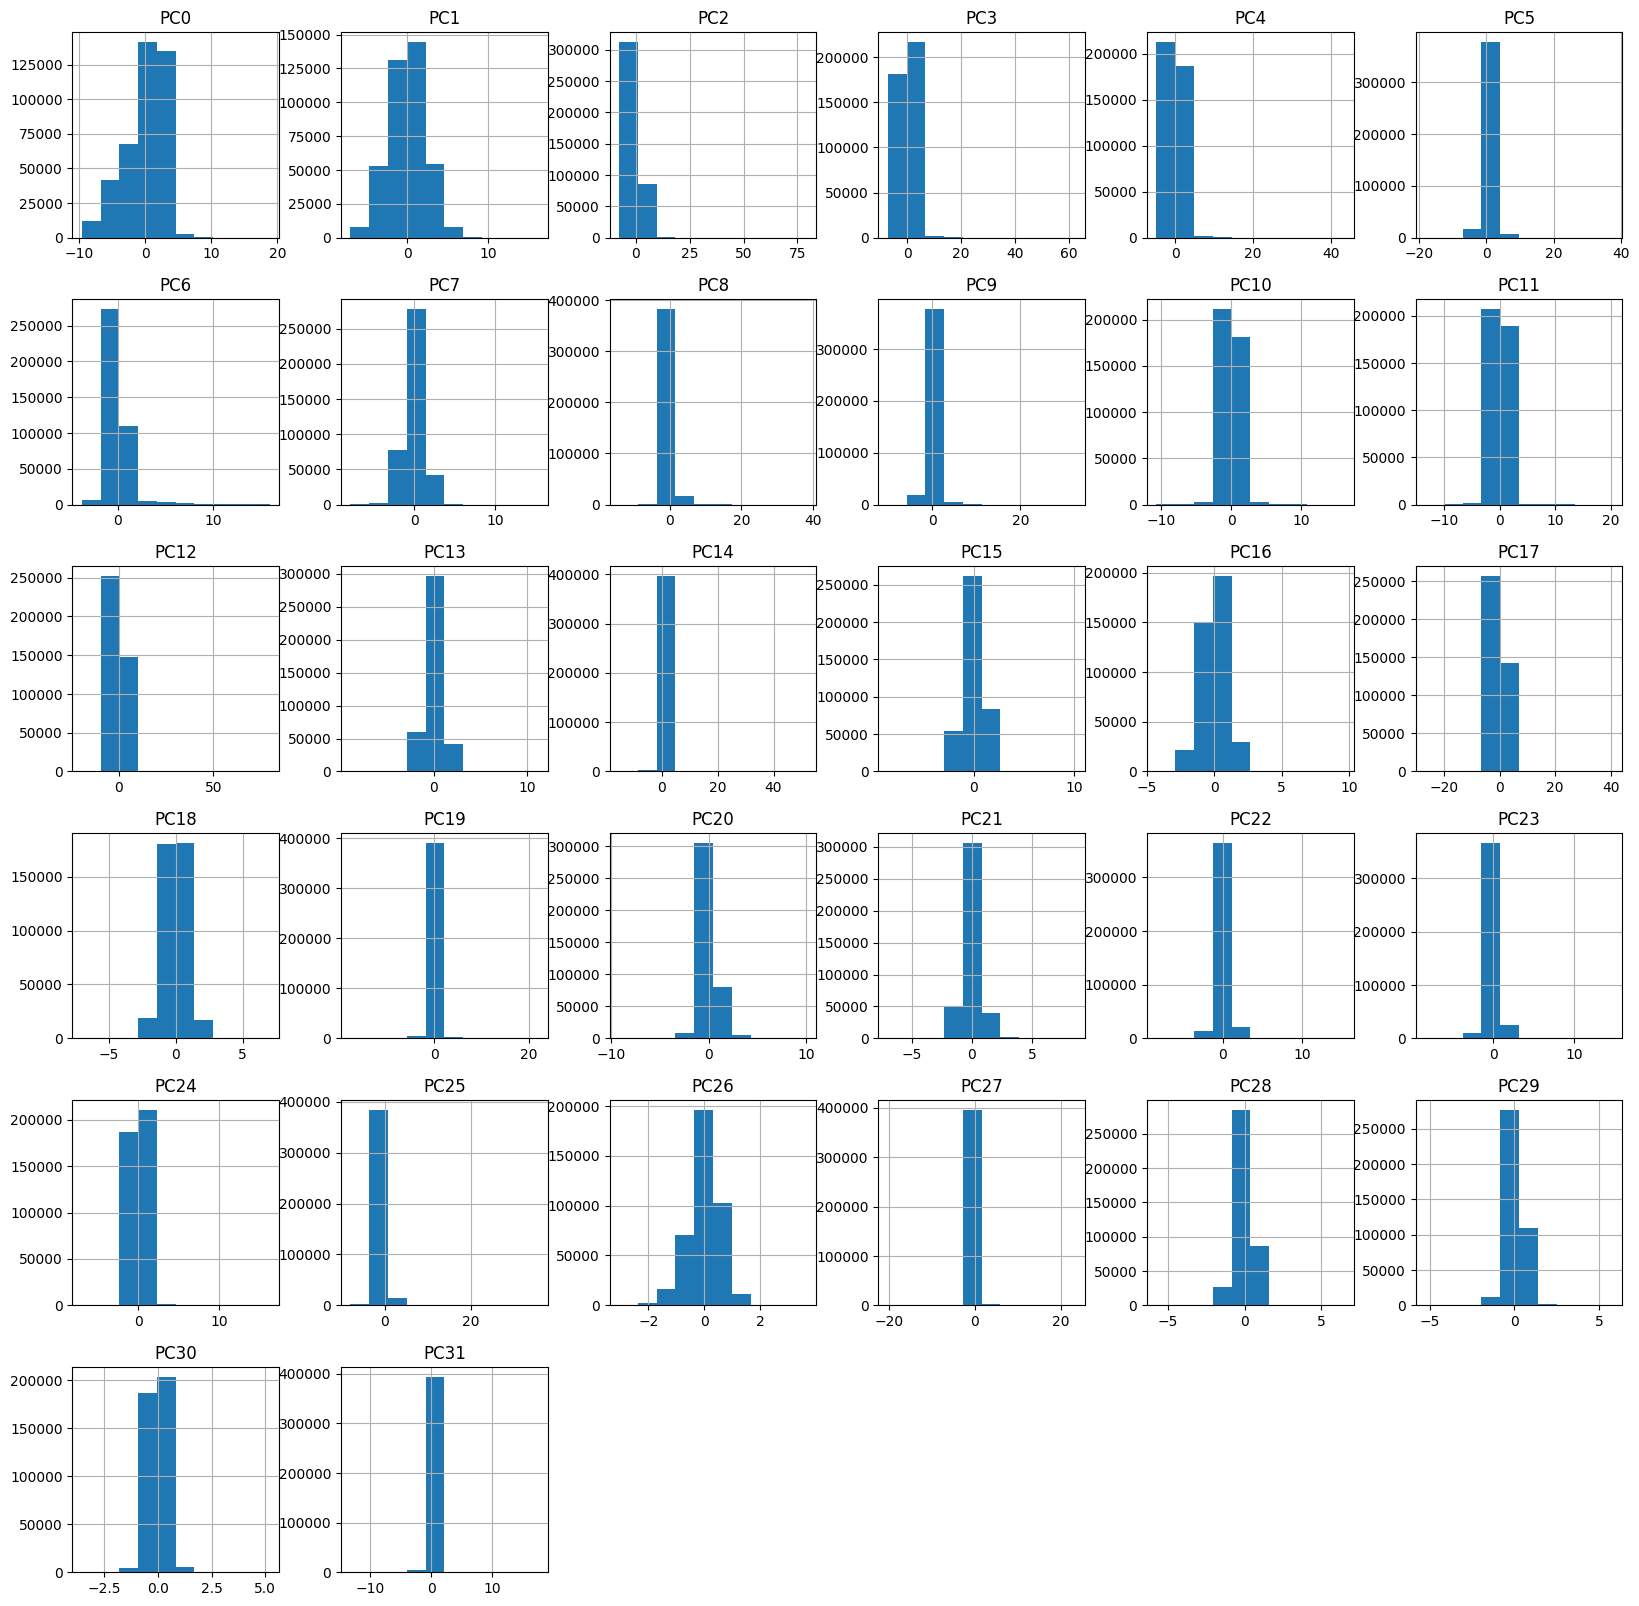

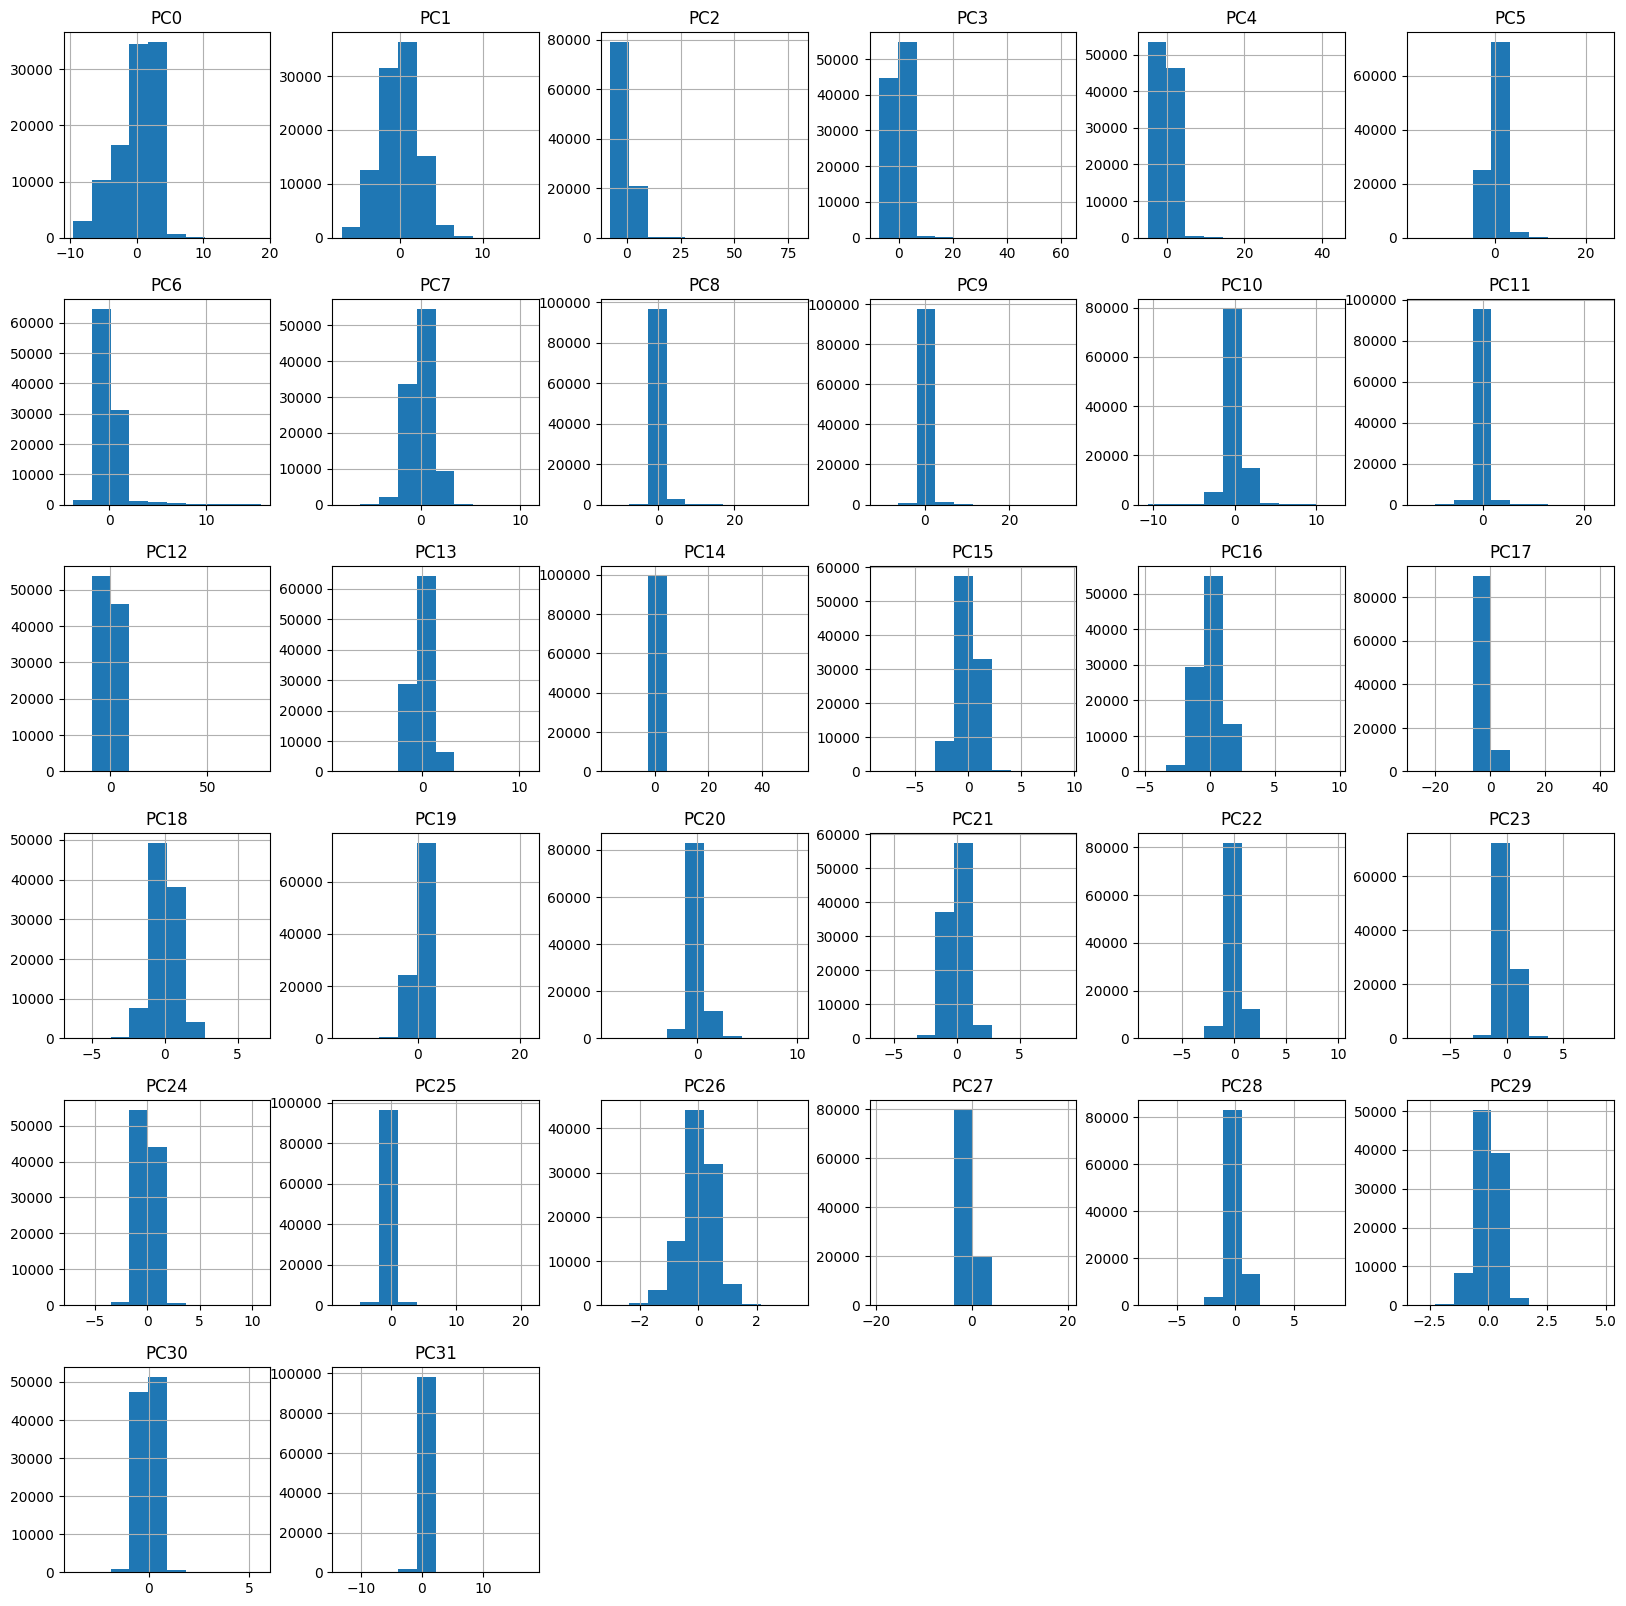

In [30]:
if display_plots:
    for per in ["15min pca", "1hour pca"]:
        pd.concat(nested_values(Xs[per], exclude_keys={"full", "BC"})).hist(figsize=(20,20))
        plt.show()

Plot correlation matrix of the data

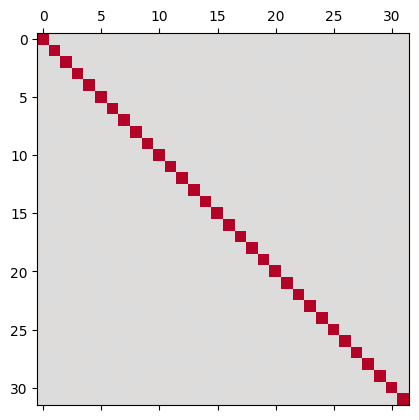

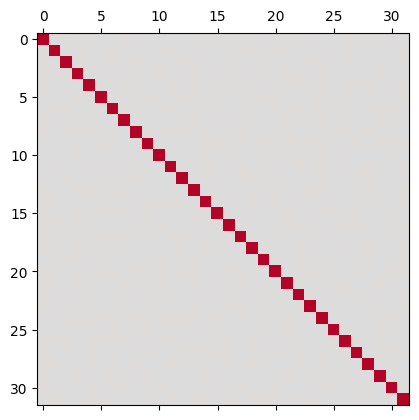

In [31]:
if display_plots:
    for per in ["15min pca", "1hour pca"]:
        plt.matshow(pd.concat(nested_values(Xs[per], exclude_keys={"full", "BC"})).corr(), cmap="coolwarm", vmin=-1, vmax=1)
        plt.show()

## Feature extraction

In [32]:
def tsfresh_format_og(Xs, pre, full):
    Xys_loc_train = []
    Xs_loc_test = []

    y_name = "pv_measurement"
    loc_name = "id"
    
    for loc in ["A", "B", "C"]:
        if full:
            X_loc_full = Xs[pre][loc]["full"]
            y_loc_train = ys[pre][loc]["full"].copy()
            X_loc_train = X_loc_full[X_loc_full.index <= y_loc_train.index[-1]].copy()
            X_loc_test = X_loc_full[X_loc_full.index > y_loc_train.index[-1]].copy()
        else:
            X_loc_train = pd.concat([Xs[pre][loc]["obs"], Xs[pre][loc]["est"]])
            y_loc_train = pd.concat([ys[pre][loc]["obs"], ys[pre][loc]["est"]])
            X_loc_test = Xs[pre][loc]["test"].copy()
        
        Xy_loc_train = X_loc_train.join(y_loc_train, how='outer')
        Xy_loc_train = Xy_loc_train.reset_index().rename(columns={'index': 'time'})
        Xy_loc_train.insert(0, loc_name, loc)
        
        X_loc_test = X_loc_test.reset_index().rename(columns={'index': 'time'})
        X_loc_test.insert(0, loc_name, loc)

        Xys_loc_train.append(Xy_loc_train)
        Xs_loc_test.append(X_loc_test)

    Xy_train = pd.concat(Xys_loc_train).dropna(subset=[y_name])
    X_test = pd.concat(Xs_loc_test)

    X = pd.concat([Xy_train.drop(columns=[y_name]), X_test]).reset_index(drop=True)
    y = Xy_train[y_name].reset_index(drop=True)
        
    return X, y

X, y = tsfresh_format_og(Xs, "og", full=False)
display(X, y)

,id,time,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,forecast_seconds
0,A,2019-06-02 22:00:00,7.7,1.230,1744.900024,0.000000,0.0,1744.900024,0.0,280.299988,0.0,0.000000,0.0,0.0,98.699997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.799988,0.0,0.0,994.200012,1000.299988,0.0,0.0,73.099998,1006.299988,0.0,0.0,-0.0,0.1,342.834015,-3.202,0.0,285.899994,100.0,39640.101562,3.7,-3.6,-0.8,-0.0,0.0
1,A,2019-06-02 23:00:00,7.7,1.225,1703.599976,0.000000,0.0,1703.599976,0.0,280.299988,0.0,0.000000,0.0,0.0,99.599998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1005.500000,0.0,0.0,993.000000,999.000000,0.0,0.0,69.199997,1005.000000,0.0,0.0,-0.0,0.2,356.742004,-4.393,0.0,286.799988,100.0,41699.898438,3.5,-3.5,0.0,-0.0,0.0
2,A,2019-06-03 00:00:00,7.7,1.221,1668.099976,0.000000,0.0,1668.099976,0.0,280.200012,0.0,0.000000,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1004.599976,0.0,0.0,992.099976,998.099976,0.0,0.1,66.000000,1004.099976,0.0,0.0,-0.0,0.2,9.741000,-3.910,0.0,287.000000,100.0,20473.000000,3.2,-3.1,0.7,-0.0,0.0
3,A,2019-06-03 01:00:00,8.2,1.218,1388.400024,0.000000,0.0,1388.400024,0.0,281.299988,0.0,0.000000,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1004.400024,0.0,0.0,991.799988,997.799988,0.0,0.2,71.099998,1003.799988,0.0,0.0,-0.0,0.7,23.541000,-1.986,0.0,286.899994,100.0,2104.600098,2.8,-2.7,0.8,-0.0,0.0
4,A,2019-06-03 02:00:00,8.8,1.219,1108.500000,6546.899902,9.8,1108.500000,0.0,282.299988,4.3,7743.299805,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1003.400024,0.0,0.0,990.900024,996.900024,0.0,0.1,78.500000,1002.900024,0.0,0.0,-0.0,0.3,37.040001,1.401,0.0,286.500000,100.0,2681.600098,2.7,-2.5,1.0,-0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89789,C,2023-07-03 22:45:00,9.0,1.207,2003.500000,0.000000,0.0,1573.000000,0.0,282.600006,0.0,0.000000,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.400024,0.0,0.0,978.799988,984.700012,0.0,0.0,84.000000,990.599976,0.0,0.0,-0.0,0.0,351.852997,-3.320,0.1,285.299988,100.0,39008.300781,1.8,1.6,-0.7,0.0,143069.0
89790,C,2023-07-03 23:00:00,9.0,1.207,2005.599976,0.000000,0.0,1471.000000,0.0,282.500000,0.0,0.000000,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.500000,0.0,0.0,978.799988,984.700012,0.0,0.0,84.099998,990.700012,0.0,0.0,-0.0,0.0,355.315002,-3.508,0.1,285.200012,100.0,39026.000000,1.7,1.6,-0.7,0.0,143969.0
89791,C,2023-07-03 23:15:00,9.0,1.207,2005.500000,0.000000,0.0,1346.900024,0.0,282.500000,0.0,0.000000,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.500000,0.0,0.0,978.900024,984.799988,0.0,0.0,84.400002,990.700012,0.0,0.0,-0.0,0.0,358.782013,-3.594,0.1,285.100006,100.0,39081.300781,1.7,1.6,-0.6,0.0,144869.0
89792,C,2023-07-03 23:30:00,8.9,1.207,2005.500000,0.000000,0.0,1222.800049,0.0,282.500000,0.0,0.000000,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.599976,0.0,0.0,979.000000,984.900024,0.0,0.0,84.800003,990.799988,0.0,0.0,-0.0,0.0,2.250000,-3.579,0.2,285.100006,100.0,39145.101562,1.7,1.6,-0.6,0.0,145769.0


0         0.00
1         0.00
2         0.00
3         0.00
4        19.36
         ...  
81149    50.96
81150     2.94
81151     0.00
81152    -0.00
81153    -0.00
Name: pv_measurement, Length: 81154, dtype: float64

# Machine learning

In [33]:
assert False

AssertionError: 

## Darts setup

Convert to darts timeseries

In [ ]:
from darts import TimeSeries

covs = {}
for per in ["15min", "1hour", "15min norm", "1hour norm", "15min pca", "1hour pca"]:
    covs[per] = {loc: {type: TimeSeries.from_dataframe(Xs[per][loc][type]) for type in Xs[per][loc] } for loc in Xs[per]}

tars = {}
for per in ["15min", "1hour", "15min norm", "1hour norm"]:
    tars[per] = {loc: {type: TimeSeries.from_series(ys[per][loc][type]) for type in ys[per][loc] } for loc in ys[per]}

assert are_all_equal([ys["15min"][loc]["est"].index[-1] for loc in ["A", "B", "C"]])
assert are_all_equal([ys["1hour"][loc]["est"].index[-1] for loc in ["A", "B", "C"]])

n_15min = len(pd.date_range(start=ys["15min"]["A"]["est"].index[-1], end=extract_dates[-1], freq='15T'))
n_1hour = len(pd.date_range(start=ys["1hour"]["A"]["est"].index[-1], end=extract_dates[-1], freq='H'))

Save predictions to csv file

In [ ]:
def extract_and_save(ys_pred, file_name, per_scalers_ys=None, path="predictions", extract_dates=extract_dates, scaler_ys=scaler_ys):
    y_pred = pd.concat([ys_pred[loc].pd_series()[extract_dates[extract_dates.minute == 0]] for loc in ["A", "B", "C"]])

    if per_scalers_ys is not None:
        y_pred = pd.Series(
            scaler_ys[per_scalers_ys].inverse_transform(y_pred.to_numpy().reshape(-1, 1)).flatten(),
            name = y_pred.name, 
            index = y_pred.index,
        )
    
    y_pred[y_pred < 0] = 0
    y_pred.name = "prediction"
    y_pred = y_pred.reset_index(drop=True).reset_index().rename(columns={'index': 'id'})
    y_pred.to_csv(os.path.join(path, file_name), index=False)
    
    return y_pred

## XGBoost

Train and make predicitons

In [ ]:
from darts.models import XGBModel

scaler_per = "1hour"
tars_per = "1hour"
covs_per = "1hour"

type = "full"

ys_pred = {}

for loc in tars[tars_per]:
    xgb = XGBModel(lags=168, lags_future_covariates=(24,24))
    xgb.fit(tars[tars_per][loc][type], future_covariates=covs[covs_per][loc][type])
    ys_pred[loc] = xgb.predict(n_1hour, future_covariates=covs[covs_per][loc][type])

In [ ]:
y = extract_and_save(ys_pred, "xbg_1hour.csv")
if display_plots:
    y["prediction"].plot(lw=0.5)
    plt.show()

In [ ]:
assert False

## AutoARIMA

Train and make predicitons

In [ ]:
from darts.models import AutoARIMA

scaler_per = "1hour"
tars_per = "1hour"
covs_per = "1hour"

type = "full"

ys_pred = {}

for loc in tars[tars_per]:
    ari = AutoARIMA()
    ari.fit(tars[tars_per][loc][type], future_covariates=covs[covs_per][loc][type])
    ys_pred[loc] = ari.predict(n_1hour, future_covariates=covs[covs_per][loc][type])

In [ ]:
y = extract_and_save(ys_pred, "ari_1hour.csv")
if display_plots:
    y["prediction"].plot(lw=0.5)
    plt.show()

## RNN model

In [ ]:
from darts.models import RNNModel

tars_per = "1hour norm"
covs_per = "1hour pca"

tars_type = "full"
covs_type = "full"

ys_pred = {}

for loc in tars[tars_per]:
    rnn_model = RNNModel(
        model="LSTM",
        hidden_dim=20,
        dropout=0,
        batch_size=16,
        n_epochs=5,
        optimizer_kwargs={"lr": 1e-3},
        model_name="Air_RNN",
        log_tensorboard=True,
        random_state=42,
        training_length=20,
        input_chunk_length=14,
        force_reset=True,
        save_checkpoints=True,
    )
    rnn_model.fit(tars[tars_per][loc][tars_type], future_covariates=covs[covs_per][loc][covs_type])
    ys_pred[loc] = rnn_model.predict(n_1hour, future_covariates=covs[covs_per][loc][covs_type])

y_15min = extract_and_save(ys_pred, "rnn_pca_1hour.csv")
if display_plots:
    y_15min["prediction"].plot(lw=0.5)
    plt.show()

assert False

Plot predictions